In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, roc_curve, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
data = pd.read_csv('SolarPrediction.csv')
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [4]:
df = data.copy()

# Extracting Date from the Date-Time Format (Data column)

In [5]:
st = '9/29/2016 12:00:00 AM'
st.split()[0]

'9/29/2016'

In [6]:
# lambda functions works as an iterator
df['Data'] = df['Data'].apply(lambda x: x.split()[0])

In [7]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
df["Month"]    = pd.to_datetime(df['Data']).dt.month
df['Day']      = pd.to_datetime(df['Data']).dt.day
df['Hour']     = pd.to_datetime(df['Time']).dt.hour
df['Minute']   = pd.to_datetime(df['Time']).dt.minute
df['Second']   = pd.to_datetime(df['Time']).dt.second

C:\Users\My Laptop\AppData\Local\Temp\ipykernel_6120\1356388338.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour']     = pd.to_datetime(df['Time']).dt.hour
C:\Users\My Laptop\AppData\Local\Temp\ipykernel_6120\1356388338.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute']   = pd.to_datetime(df['Time']).dt.minute
C:\Users\My Laptop\AppData\Local\Temp\ipykernel_6120\1356388338.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Second']   = pd.to_datetime(df['Time']).dt.second


In [9]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


# Extracting Hour and Minute from TimeSunRise and TimeSunSet using regular expression

In [10]:
# ^\d : we don't want to extract anything which is not a digit
import re
df['riseHour']   = df['TimeSunRise'].apply(lambda x: int(re.search(r'^(\d+):', x).group(1)))
df['riseMinute'] = df['TimeSunRise'].apply(lambda x: int(re.search(r'(?<=\:)\d+(?=\:)', x).group(0)))

df['setHour']   = df['TimeSunSet'].apply(lambda x: int(re.search(r'^\d+', x).group(0)))
df['setMinute'] = df['TimeSunSet'].apply(lambda x: int(re.search(r'(?<=\:)\d+(?=\:)', x).group(0)))

In [11]:
df.tail()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,riseHour,riseMinute,setHour,setMinute
32681,1480587604,12/1/2016,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,12,1,0,20,4,6,41,17,42
32682,1480587301,12/1/2016,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,12,1,0,15,1,6,41,17,42
32683,1480587001,12/1/2016,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,12,1,0,10,1,6,41,17,42
32684,1480586702,12/1/2016,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,12,1,0,5,2,6,41,17,42
32685,1480586402,12/1/2016,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00,12,1,0,0,2,6,41,17,42


In [12]:
# Dropping parameters that are not required
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [13]:
df.shape

(32686, 15)

In [14]:
# Checking for null values in the dataset
df.isnull().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
riseHour                  0
riseMinute                0
setHour                   0
setMinute                 0
dtype: int64

In [15]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,riseHour,riseMinute,setHour,setMinute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


# Feature Selection using SelectKBest Method

In [16]:
bestfeatures = SelectKBest(score_func = chi2,k=10)
bestfeatures

SelectKBest(score_func=<function chi2 at 0x000001A57E399900>)

In [17]:
input_features = df.drop(['Radiation'],axis=1)
target = df['Radiation']

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_Y = label_encoder.fit_transform(target)

In [19]:
# Multiplying each target value by 100 to convert it into integer
target_count = df["Radiation"].apply(lambda x:int(x*100))

In [20]:
# Scaling input features
scaled_input_features = MinMaxScaler().fit_transform(input_features)
fit = bestfeatures.fit(scaled_input_features,target_count)

In [21]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(input_features.columns)

In [22]:
featureScores = pd.concat([column,scores],axis=1)
featureScores.columns = ['features','feature_imp']
featureScores.sort_values(by='feature_imp',ascending=False,inplace=True)

In [23]:
featureScores

,features,feature_imp
12,setHour,12207.531454
5,Month,4684.579610
11,riseMinute,4015.062771
3,WindDirection(Degrees),3271.827277
6,Day,2841.926850
8,Minute,2702.449333
9,Second,2288.673032
13,setMinute,1863.712087
0,Temperature,1651.685632
2,Humidity,1588.087433


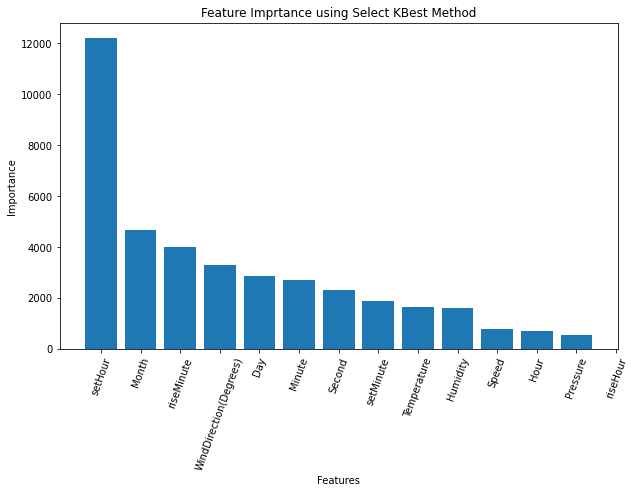

In [24]:
plt.figure(figsize=(10,6))
plt.bar(featureScores.features,featureScores.feature_imp)
plt.xticks(rotation=70)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Imprtance using Select KBest Method')
plt.show()

In [25]:
featureScores


,features,feature_imp
12,setHour,12207.531454
5,Month,4684.579610
11,riseMinute,4015.062771
3,WindDirection(Degrees),3271.827277
6,Day,2841.926850
8,Minute,2702.449333
9,Second,2288.673032
13,setMinute,1863.712087
0,Temperature,1651.685632
2,Humidity,1588.087433


In [26]:
df.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'riseHour', 'riseMinute', 'setHour', 'setMinute'],
      dtype='object')

In [27]:
df.drop(['riseHour'],axis=1,inplace=True)

In [28]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,riseMinute,setHour,setMinute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,13,18,13


In [29]:
x = df.drop('Radiation',axis=1)
y = df['Radiation']

In [30]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# xgboost

In [36]:
from xgboost import XGBRegressor
params = {
    'learning_rate':0.1,
    'max_depth'    :8
}

model1 = XGBRegressor(**params).fit(xtrain, ytrain)
predictions = model1.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 83.72906644265726
R2 score on Test Set: 0.9294334929743198
Mean Squared Error (MSE): 7010.5565673589135
Mean Absolute Error (MAE): 33.727988621559255
Mean Absolute Percentage Error (MAPE) on Test Set: 0.9442528638413428


# lightgbm

In [38]:
import lightgbm as lgb
model2 = lgb.LGBMRegressor(random_state=42)  
model2.fit(xtrain, ytrain)
predictions = model2.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 26148, number of used features: 13
[LightGBM] [Info] Start training from score 208.044780
Root Mean Squared Error (RMSE) on Test Set: 85.35134330703266
R2 score on Test Set: 0.9266725058002215
Mean Squared Error (MSE): 7284.85180431495
Mean Absolute Error (MAE): 37.390718731491965
Mean Absolute Percentage Error (MAPE) on Test Set: 1.251960932838049


# Voting Ensemble using catboost + Random Forest

In [33]:
from sklearn.ensemble import VotingRegressor

In [34]:
ensemble_model = VotingRegressor(estimators=[('RF', model4), ('cat', model3)])

# Fit ensemble model on training data
ensemble_model.fit(xtrain, ytrain)

# Predict on test data
ensemble_predictions = ensemble_model.predict(xtest)


0:	learn: 290.2800517	total: 48.1ms	remaining: 8m
1:	learn: 267.5702405	total: 97.3ms	remaining: 8m 6s
2:	learn: 246.8197844	total: 139ms	remaining: 7m 42s
3:	learn: 228.7485111	total: 178ms	remaining: 7m 25s
4:	learn: 212.3685079	total: 217ms	remaining: 7m 13s
5:	learn: 198.1844006	total: 256ms	remaining: 7m 6s
6:	learn: 185.8176637	total: 349ms	remaining: 8m 17s
7:	learn: 174.2966761	total: 406ms	remaining: 8m 27s
8:	learn: 164.1018206	total: 450ms	remaining: 8m 19s
9:	learn: 155.4851201	total: 491ms	remaining: 8m 10s
10:	learn: 147.4795933	total: 532ms	remaining: 8m 2s
11:	learn: 140.8415082	total: 574ms	remaining: 7m 57s
12:	learn: 135.0307726	total: 623ms	remaining: 7m 58s
13:	learn: 129.5467636	total: 651ms	remaining: 7m 44s
14:	learn: 124.7701552	total: 678ms	remaining: 7m 31s
15:	learn: 120.8112598	total: 705ms	remaining: 7m 19s
16:	learn: 117.1108009	total: 734ms	remaining: 7m 10s
17:	learn: 114.0515833	total: 762ms	remaining: 7m 2s
18:	learn: 111.1241739	total: 794ms	remainin

157:	learn: 65.5956847	total: 6.09s	remaining: 6m 19s
158:	learn: 65.4973401	total: 6.13s	remaining: 6m 19s
159:	learn: 65.4082475	total: 6.17s	remaining: 6m 19s
160:	learn: 65.3291884	total: 6.21s	remaining: 6m 19s
161:	learn: 65.1800741	total: 6.25s	remaining: 6m 19s
162:	learn: 65.0616703	total: 6.3s	remaining: 6m 20s
163:	learn: 64.9117901	total: 6.34s	remaining: 6m 20s
164:	learn: 64.8262331	total: 6.42s	remaining: 6m 22s
165:	learn: 64.6973586	total: 6.46s	remaining: 6m 22s
166:	learn: 64.5957503	total: 6.5s	remaining: 6m 22s
167:	learn: 64.5057507	total: 6.54s	remaining: 6m 22s
168:	learn: 64.4160986	total: 6.58s	remaining: 6m 22s
169:	learn: 64.3733159	total: 6.62s	remaining: 6m 22s
170:	learn: 64.3262235	total: 6.66s	remaining: 6m 22s
171:	learn: 64.2675108	total: 6.7s	remaining: 6m 22s
172:	learn: 64.1995329	total: 6.73s	remaining: 6m 22s
173:	learn: 64.1041999	total: 6.76s	remaining: 6m 21s
174:	learn: 63.9732022	total: 6.79s	remaining: 6m 21s
175:	learn: 63.8453026	total: 6

316:	learn: 52.3041893	total: 11.8s	remaining: 6m 1s
317:	learn: 52.2392225	total: 11.9s	remaining: 6m 1s
318:	learn: 52.2293246	total: 11.9s	remaining: 6m 2s
319:	learn: 52.1691849	total: 12s	remaining: 6m 2s
320:	learn: 52.1003294	total: 12s	remaining: 6m 2s
321:	learn: 52.0597744	total: 12.1s	remaining: 6m 2s
322:	learn: 52.0156222	total: 12.1s	remaining: 6m 2s
323:	learn: 51.9652283	total: 12.1s	remaining: 6m 2s
324:	learn: 51.8859244	total: 12.2s	remaining: 6m 2s
325:	learn: 51.8182499	total: 12.2s	remaining: 6m 2s
326:	learn: 51.7368602	total: 12.3s	remaining: 6m 2s
327:	learn: 51.6943723	total: 12.3s	remaining: 6m 2s
328:	learn: 51.6298954	total: 12.3s	remaining: 6m 2s
329:	learn: 51.6014025	total: 12.4s	remaining: 6m 2s
330:	learn: 51.5418514	total: 12.4s	remaining: 6m 2s
331:	learn: 51.5105175	total: 12.5s	remaining: 6m 2s
332:	learn: 51.4683019	total: 12.5s	remaining: 6m 4s
333:	learn: 51.3649491	total: 12.6s	remaining: 6m 4s
334:	learn: 51.2946979	total: 12.6s	remaining: 6m 

474:	learn: 43.8084748	total: 17.8s	remaining: 5m 56s
475:	learn: 43.7585824	total: 17.8s	remaining: 5m 56s
476:	learn: 43.7109265	total: 17.9s	remaining: 5m 56s
477:	learn: 43.6479842	total: 17.9s	remaining: 5m 56s
478:	learn: 43.6174895	total: 17.9s	remaining: 5m 56s
479:	learn: 43.5928926	total: 18s	remaining: 5m 57s
480:	learn: 43.5320615	total: 18.1s	remaining: 5m 58s
481:	learn: 43.4691026	total: 18.2s	remaining: 5m 58s
482:	learn: 43.4421005	total: 18.2s	remaining: 5m 59s
483:	learn: 43.4146657	total: 18.3s	remaining: 5m 59s
484:	learn: 43.4083181	total: 18.4s	remaining: 6m
485:	learn: 43.3601776	total: 18.4s	remaining: 6m
486:	learn: 43.3399319	total: 18.5s	remaining: 6m 1s
487:	learn: 43.2972128	total: 18.5s	remaining: 6m 1s
488:	learn: 43.2128465	total: 18.6s	remaining: 6m 2s
489:	learn: 43.1569887	total: 18.7s	remaining: 6m 3s
490:	learn: 43.1288932	total: 18.8s	remaining: 6m 4s
491:	learn: 43.0904421	total: 18.9s	remaining: 6m 4s
492:	learn: 43.0534368	total: 18.9s	remainin

629:	learn: 37.7645519	total: 25.1s	remaining: 6m 12s
630:	learn: 37.7287757	total: 25.1s	remaining: 6m 12s
631:	learn: 37.7148989	total: 25.1s	remaining: 6m 12s
632:	learn: 37.7018901	total: 25.2s	remaining: 6m 12s
633:	learn: 37.6443697	total: 25.2s	remaining: 6m 12s
634:	learn: 37.6226378	total: 25.2s	remaining: 6m 12s
635:	learn: 37.5979396	total: 25.3s	remaining: 6m 12s
636:	learn: 37.5525076	total: 25.3s	remaining: 6m 11s
637:	learn: 37.5128307	total: 25.3s	remaining: 6m 11s
638:	learn: 37.5033681	total: 25.4s	remaining: 6m 11s
639:	learn: 37.4642833	total: 25.4s	remaining: 6m 11s
640:	learn: 37.4263040	total: 25.4s	remaining: 6m 11s
641:	learn: 37.3952506	total: 25.5s	remaining: 6m 11s
642:	learn: 37.3552237	total: 25.5s	remaining: 6m 11s
643:	learn: 37.2969984	total: 25.5s	remaining: 6m 10s
644:	learn: 37.2860342	total: 25.6s	remaining: 6m 10s
645:	learn: 37.2701162	total: 25.6s	remaining: 6m 10s
646:	learn: 37.2400574	total: 25.6s	remaining: 6m 10s
647:	learn: 37.2053036	total

786:	learn: 32.9407455	total: 32.3s	remaining: 6m 18s
787:	learn: 32.8963480	total: 32.3s	remaining: 6m 18s
788:	learn: 32.8577719	total: 32.4s	remaining: 6m 18s
789:	learn: 32.8346232	total: 32.4s	remaining: 6m 18s
790:	learn: 32.8012646	total: 32.5s	remaining: 6m 17s
791:	learn: 32.7907360	total: 32.5s	remaining: 6m 17s
792:	learn: 32.7724640	total: 32.5s	remaining: 6m 17s
793:	learn: 32.7502107	total: 32.6s	remaining: 6m 17s
794:	learn: 32.7307990	total: 32.6s	remaining: 6m 17s
795:	learn: 32.7187804	total: 32.7s	remaining: 6m 17s
796:	learn: 32.6792315	total: 32.7s	remaining: 6m 17s
797:	learn: 32.6583774	total: 32.8s	remaining: 6m 17s
798:	learn: 32.6362659	total: 32.8s	remaining: 6m 17s
799:	learn: 32.6147623	total: 32.8s	remaining: 6m 17s
800:	learn: 32.5968013	total: 32.9s	remaining: 6m 17s
801:	learn: 32.5875125	total: 32.9s	remaining: 6m 17s
802:	learn: 32.5646852	total: 33s	remaining: 6m 17s
803:	learn: 32.5436161	total: 33s	remaining: 6m 17s
804:	learn: 32.5237611	total: 33

940:	learn: 29.1501570	total: 39.1s	remaining: 6m 16s
941:	learn: 29.1201311	total: 39.2s	remaining: 6m 16s
942:	learn: 29.0866411	total: 39.2s	remaining: 6m 16s
943:	learn: 29.0685766	total: 39.2s	remaining: 6m 16s
944:	learn: 29.0492703	total: 39.3s	remaining: 6m 16s
945:	learn: 29.0368611	total: 39.3s	remaining: 6m 16s
946:	learn: 29.0148187	total: 39.3s	remaining: 6m 16s
947:	learn: 28.9972524	total: 39.4s	remaining: 6m 16s
948:	learn: 28.9568217	total: 39.4s	remaining: 6m 16s
949:	learn: 28.9412636	total: 39.5s	remaining: 6m 16s
950:	learn: 28.9244248	total: 39.5s	remaining: 6m 15s
951:	learn: 28.8962109	total: 39.6s	remaining: 6m 15s
952:	learn: 28.8565286	total: 39.6s	remaining: 6m 15s
953:	learn: 28.8391382	total: 39.6s	remaining: 6m 15s
954:	learn: 28.8052958	total: 39.7s	remaining: 6m 15s
955:	learn: 28.7887548	total: 39.7s	remaining: 6m 15s
956:	learn: 28.7746801	total: 39.7s	remaining: 6m 15s
957:	learn: 28.7474049	total: 39.7s	remaining: 6m 15s
958:	learn: 28.7170650	total

1097:	learn: 25.9489532	total: 45.1s	remaining: 6m 6s
1098:	learn: 25.9210476	total: 45.2s	remaining: 6m 5s
1099:	learn: 25.9103116	total: 45.2s	remaining: 6m 5s
1100:	learn: 25.8956634	total: 45.2s	remaining: 6m 5s
1101:	learn: 25.8878219	total: 45.3s	remaining: 6m 5s
1102:	learn: 25.8770444	total: 45.3s	remaining: 6m 5s
1103:	learn: 25.8528325	total: 45.3s	remaining: 6m 5s
1104:	learn: 25.8356787	total: 45.3s	remaining: 6m 5s
1105:	learn: 25.8282112	total: 45.4s	remaining: 6m 4s
1106:	learn: 25.8115267	total: 45.4s	remaining: 6m 4s
1107:	learn: 25.7896842	total: 45.4s	remaining: 6m 4s
1108:	learn: 25.7714307	total: 45.5s	remaining: 6m 4s
1109:	learn: 25.7525345	total: 45.5s	remaining: 6m 4s
1110:	learn: 25.7329672	total: 45.5s	remaining: 6m 4s
1111:	learn: 25.7148964	total: 45.5s	remaining: 6m 4s
1112:	learn: 25.6995404	total: 45.6s	remaining: 6m 3s
1113:	learn: 25.6790155	total: 45.6s	remaining: 6m 3s
1114:	learn: 25.6615387	total: 45.6s	remaining: 6m 3s
1115:	learn: 25.6269820	tota

1250:	learn: 23.4056859	total: 50.7s	remaining: 5m 54s
1251:	learn: 23.3924469	total: 50.7s	remaining: 5m 54s
1252:	learn: 23.3674901	total: 50.8s	remaining: 5m 54s
1253:	learn: 23.3487504	total: 50.8s	remaining: 5m 54s
1254:	learn: 23.3293157	total: 50.9s	remaining: 5m 54s
1255:	learn: 23.3213435	total: 50.9s	remaining: 5m 54s
1256:	learn: 23.2994113	total: 51s	remaining: 5m 54s
1257:	learn: 23.2881042	total: 51s	remaining: 5m 54s
1258:	learn: 23.2839857	total: 51s	remaining: 5m 54s
1259:	learn: 23.2703636	total: 51.1s	remaining: 5m 54s
1260:	learn: 23.2529358	total: 51.1s	remaining: 5m 54s
1261:	learn: 23.2296158	total: 51.2s	remaining: 5m 54s
1262:	learn: 23.2159623	total: 51.2s	remaining: 5m 54s
1263:	learn: 23.2005735	total: 51.2s	remaining: 5m 54s
1264:	learn: 23.1883801	total: 51.3s	remaining: 5m 54s
1265:	learn: 23.1684566	total: 51.3s	remaining: 5m 54s
1266:	learn: 23.1627183	total: 51.4s	remaining: 5m 54s
1267:	learn: 23.1547986	total: 51.4s	remaining: 5m 54s
1268:	learn: 23.

1402:	learn: 20.9648444	total: 56.4s	remaining: 5m 45s
1403:	learn: 20.9400471	total: 56.4s	remaining: 5m 45s
1404:	learn: 20.9290567	total: 56.4s	remaining: 5m 45s
1405:	learn: 20.9103968	total: 56.4s	remaining: 5m 45s
1406:	learn: 20.9018504	total: 56.5s	remaining: 5m 44s
1407:	learn: 20.8797442	total: 56.5s	remaining: 5m 44s
1408:	learn: 20.8622902	total: 56.5s	remaining: 5m 44s
1409:	learn: 20.8438747	total: 56.6s	remaining: 5m 44s
1410:	learn: 20.8294062	total: 56.6s	remaining: 5m 44s
1411:	learn: 20.8141929	total: 56.6s	remaining: 5m 44s
1412:	learn: 20.7910573	total: 56.6s	remaining: 5m 44s
1413:	learn: 20.7796587	total: 56.7s	remaining: 5m 44s
1414:	learn: 20.7745912	total: 56.7s	remaining: 5m 44s
1415:	learn: 20.7685560	total: 56.7s	remaining: 5m 43s
1416:	learn: 20.7496057	total: 56.8s	remaining: 5m 43s
1417:	learn: 20.7456387	total: 56.8s	remaining: 5m 43s
1418:	learn: 20.7322050	total: 56.8s	remaining: 5m 43s
1419:	learn: 20.7218799	total: 56.9s	remaining: 5m 43s
1420:	lear

1555:	learn: 18.9227604	total: 1m 2s	remaining: 5m 38s
1556:	learn: 18.9130119	total: 1m 2s	remaining: 5m 38s
1557:	learn: 18.8976521	total: 1m 2s	remaining: 5m 38s
1558:	learn: 18.8866899	total: 1m 2s	remaining: 5m 38s
1559:	learn: 18.8731815	total: 1m 2s	remaining: 5m 38s
1560:	learn: 18.8425557	total: 1m 2s	remaining: 5m 38s
1561:	learn: 18.8241663	total: 1m 2s	remaining: 5m 37s
1562:	learn: 18.8064663	total: 1m 2s	remaining: 5m 37s
1563:	learn: 18.7905710	total: 1m 2s	remaining: 5m 37s
1564:	learn: 18.7827629	total: 1m 2s	remaining: 5m 37s
1565:	learn: 18.7601653	total: 1m 2s	remaining: 5m 37s
1566:	learn: 18.7479528	total: 1m 2s	remaining: 5m 37s
1567:	learn: 18.7443644	total: 1m 2s	remaining: 5m 37s
1568:	learn: 18.7367448	total: 1m 2s	remaining: 5m 37s
1569:	learn: 18.7204875	total: 1m 2s	remaining: 5m 37s
1570:	learn: 18.7183040	total: 1m 2s	remaining: 5m 37s
1571:	learn: 18.7029772	total: 1m 2s	remaining: 5m 37s
1572:	learn: 18.6953120	total: 1m 2s	remaining: 5m 36s
1573:	lear

1709:	learn: 17.2333642	total: 1m 7s	remaining: 5m 27s
1710:	learn: 17.2181235	total: 1m 7s	remaining: 5m 27s
1711:	learn: 17.2087288	total: 1m 7s	remaining: 5m 27s
1712:	learn: 17.2017796	total: 1m 7s	remaining: 5m 27s
1713:	learn: 17.1930265	total: 1m 7s	remaining: 5m 27s
1714:	learn: 17.1879161	total: 1m 7s	remaining: 5m 27s
1715:	learn: 17.1794868	total: 1m 7s	remaining: 5m 27s
1716:	learn: 17.1698800	total: 1m 7s	remaining: 5m 27s
1717:	learn: 17.1641864	total: 1m 7s	remaining: 5m 27s
1718:	learn: 17.1548380	total: 1m 7s	remaining: 5m 27s
1719:	learn: 17.1434393	total: 1m 7s	remaining: 5m 27s
1720:	learn: 17.1323533	total: 1m 8s	remaining: 5m 27s
1721:	learn: 17.1226927	total: 1m 8s	remaining: 5m 27s
1722:	learn: 17.1178032	total: 1m 8s	remaining: 5m 27s
1723:	learn: 17.1064144	total: 1m 8s	remaining: 5m 27s
1724:	learn: 17.0899222	total: 1m 8s	remaining: 5m 27s
1725:	learn: 17.0852207	total: 1m 8s	remaining: 5m 27s
1726:	learn: 17.0779169	total: 1m 8s	remaining: 5m 27s
1727:	lear

1858:	learn: 15.7343930	total: 1m 13s	remaining: 5m 22s
1859:	learn: 15.7288674	total: 1m 13s	remaining: 5m 22s
1860:	learn: 15.7210557	total: 1m 13s	remaining: 5m 22s
1861:	learn: 15.7102342	total: 1m 13s	remaining: 5m 21s
1862:	learn: 15.6971430	total: 1m 13s	remaining: 5m 21s
1863:	learn: 15.6935701	total: 1m 13s	remaining: 5m 21s
1864:	learn: 15.6866751	total: 1m 13s	remaining: 5m 21s
1865:	learn: 15.6693223	total: 1m 13s	remaining: 5m 21s
1866:	learn: 15.6485157	total: 1m 13s	remaining: 5m 21s
1867:	learn: 15.6380910	total: 1m 13s	remaining: 5m 21s
1868:	learn: 15.6217557	total: 1m 13s	remaining: 5m 21s
1869:	learn: 15.6071888	total: 1m 13s	remaining: 5m 21s
1870:	learn: 15.5967293	total: 1m 14s	remaining: 5m 21s
1871:	learn: 15.5839601	total: 1m 14s	remaining: 5m 21s
1872:	learn: 15.5779622	total: 1m 14s	remaining: 5m 21s
1873:	learn: 15.5681973	total: 1m 14s	remaining: 5m 21s
1874:	learn: 15.5599598	total: 1m 14s	remaining: 5m 21s
1875:	learn: 15.5527214	total: 1m 14s	remaining:

2007:	learn: 14.3624373	total: 1m 19s	remaining: 5m 16s
2008:	learn: 14.3593209	total: 1m 19s	remaining: 5m 16s
2009:	learn: 14.3547266	total: 1m 19s	remaining: 5m 16s
2010:	learn: 14.3456066	total: 1m 19s	remaining: 5m 16s
2011:	learn: 14.3354980	total: 1m 19s	remaining: 5m 16s
2012:	learn: 14.3329206	total: 1m 19s	remaining: 5m 16s
2013:	learn: 14.3245991	total: 1m 19s	remaining: 5m 16s
2014:	learn: 14.3143526	total: 1m 19s	remaining: 5m 16s
2015:	learn: 14.3101990	total: 1m 19s	remaining: 5m 15s
2016:	learn: 14.2996089	total: 1m 19s	remaining: 5m 16s
2017:	learn: 14.2926124	total: 1m 19s	remaining: 5m 16s
2018:	learn: 14.2839387	total: 1m 20s	remaining: 5m 16s
2019:	learn: 14.2755310	total: 1m 20s	remaining: 5m 16s
2020:	learn: 14.2655351	total: 1m 20s	remaining: 5m 16s
2021:	learn: 14.2618571	total: 1m 20s	remaining: 5m 16s
2022:	learn: 14.2525770	total: 1m 20s	remaining: 5m 16s
2023:	learn: 14.2471420	total: 1m 20s	remaining: 5m 16s
2024:	learn: 14.2424523	total: 1m 20s	remaining:

2158:	learn: 13.1941772	total: 1m 24s	remaining: 5m 8s
2159:	learn: 13.1870816	total: 1m 25s	remaining: 5m 8s
2160:	learn: 13.1833485	total: 1m 25s	remaining: 5m 8s
2161:	learn: 13.1760269	total: 1m 25s	remaining: 5m 8s
2162:	learn: 13.1680061	total: 1m 25s	remaining: 5m 8s
2163:	learn: 13.1654571	total: 1m 25s	remaining: 5m 8s
2164:	learn: 13.1544538	total: 1m 25s	remaining: 5m 8s
2165:	learn: 13.1438605	total: 1m 25s	remaining: 5m 8s
2166:	learn: 13.1336267	total: 1m 25s	remaining: 5m 8s
2167:	learn: 13.1249111	total: 1m 25s	remaining: 5m 8s
2168:	learn: 13.1196927	total: 1m 25s	remaining: 5m 8s
2169:	learn: 13.1059688	total: 1m 25s	remaining: 5m 8s
2170:	learn: 13.0991258	total: 1m 25s	remaining: 5m 8s
2171:	learn: 13.0939974	total: 1m 25s	remaining: 5m 8s
2172:	learn: 13.0887041	total: 1m 25s	remaining: 5m 8s
2173:	learn: 13.0833356	total: 1m 25s	remaining: 5m 8s
2174:	learn: 13.0739701	total: 1m 25s	remaining: 5m 8s
2175:	learn: 13.0695655	total: 1m 25s	remaining: 5m 8s
2176:	lear

2309:	learn: 12.1788397	total: 1m 30s	remaining: 5m 1s
2310:	learn: 12.1737032	total: 1m 30s	remaining: 5m 1s
2311:	learn: 12.1713169	total: 1m 30s	remaining: 5m 1s
2312:	learn: 12.1686175	total: 1m 30s	remaining: 5m 1s
2313:	learn: 12.1652114	total: 1m 30s	remaining: 5m 1s
2314:	learn: 12.1617609	total: 1m 30s	remaining: 5m 1s
2315:	learn: 12.1562231	total: 1m 30s	remaining: 5m 1s
2316:	learn: 12.1505957	total: 1m 30s	remaining: 5m 1s
2317:	learn: 12.1442030	total: 1m 30s	remaining: 5m 1s
2318:	learn: 12.1348486	total: 1m 30s	remaining: 5m 1s
2319:	learn: 12.1266598	total: 1m 30s	remaining: 5m 1s
2320:	learn: 12.1241577	total: 1m 30s	remaining: 5m 1s
2321:	learn: 12.1202361	total: 1m 31s	remaining: 5m
2322:	learn: 12.1132503	total: 1m 31s	remaining: 5m
2323:	learn: 12.1024986	total: 1m 31s	remaining: 5m
2324:	learn: 12.0995688	total: 1m 31s	remaining: 5m
2325:	learn: 12.0931078	total: 1m 31s	remaining: 5m
2326:	learn: 12.0825715	total: 1m 31s	remaining: 5m
2327:	learn: 12.0763639	tota

2461:	learn: 11.3610946	total: 1m 36s	remaining: 4m 54s
2462:	learn: 11.3561550	total: 1m 36s	remaining: 4m 54s
2463:	learn: 11.3510936	total: 1m 36s	remaining: 4m 54s
2464:	learn: 11.3422583	total: 1m 36s	remaining: 4m 54s
2465:	learn: 11.3399231	total: 1m 36s	remaining: 4m 54s
2466:	learn: 11.3330365	total: 1m 36s	remaining: 4m 54s
2467:	learn: 11.3260558	total: 1m 36s	remaining: 4m 54s
2468:	learn: 11.3179699	total: 1m 36s	remaining: 4m 54s
2469:	learn: 11.3149202	total: 1m 36s	remaining: 4m 54s
2470:	learn: 11.3063740	total: 1m 36s	remaining: 4m 53s
2471:	learn: 11.3011628	total: 1m 36s	remaining: 4m 53s
2472:	learn: 11.2936935	total: 1m 36s	remaining: 4m 53s
2473:	learn: 11.2912908	total: 1m 36s	remaining: 4m 53s
2474:	learn: 11.2828651	total: 1m 36s	remaining: 4m 53s
2475:	learn: 11.2803293	total: 1m 36s	remaining: 4m 53s
2476:	learn: 11.2760133	total: 1m 36s	remaining: 4m 53s
2477:	learn: 11.2694685	total: 1m 36s	remaining: 4m 53s
2478:	learn: 11.2680573	total: 1m 36s	remaining:

2612:	learn: 10.5268288	total: 1m 41s	remaining: 4m 48s
2613:	learn: 10.5225020	total: 1m 41s	remaining: 4m 48s
2614:	learn: 10.5193135	total: 1m 41s	remaining: 4m 48s
2615:	learn: 10.5132878	total: 1m 42s	remaining: 4m 47s
2616:	learn: 10.5089056	total: 1m 42s	remaining: 4m 47s
2617:	learn: 10.5022454	total: 1m 42s	remaining: 4m 47s
2618:	learn: 10.4969235	total: 1m 42s	remaining: 4m 47s
2619:	learn: 10.4929222	total: 1m 42s	remaining: 4m 47s
2620:	learn: 10.4897535	total: 1m 42s	remaining: 4m 47s
2621:	learn: 10.4813985	total: 1m 42s	remaining: 4m 47s
2622:	learn: 10.4731798	total: 1m 42s	remaining: 4m 47s
2623:	learn: 10.4697341	total: 1m 42s	remaining: 4m 47s
2624:	learn: 10.4640578	total: 1m 42s	remaining: 4m 47s
2625:	learn: 10.4612984	total: 1m 42s	remaining: 4m 47s
2626:	learn: 10.4537568	total: 1m 42s	remaining: 4m 47s
2627:	learn: 10.4450886	total: 1m 42s	remaining: 4m 47s
2628:	learn: 10.4407852	total: 1m 42s	remaining: 4m 47s
2629:	learn: 10.4366259	total: 1m 42s	remaining:

2764:	learn: 9.8003870	total: 1m 47s	remaining: 4m 41s
2765:	learn: 9.7945557	total: 1m 47s	remaining: 4m 41s
2766:	learn: 9.7917307	total: 1m 47s	remaining: 4m 41s
2767:	learn: 9.7888137	total: 1m 47s	remaining: 4m 41s
2768:	learn: 9.7827441	total: 1m 47s	remaining: 4m 41s
2769:	learn: 9.7773593	total: 1m 47s	remaining: 4m 41s
2770:	learn: 9.7752117	total: 1m 47s	remaining: 4m 41s
2771:	learn: 9.7721478	total: 1m 47s	remaining: 4m 41s
2772:	learn: 9.7686587	total: 1m 47s	remaining: 4m 41s
2773:	learn: 9.7586937	total: 1m 47s	remaining: 4m 41s
2774:	learn: 9.7571445	total: 1m 47s	remaining: 4m 41s
2775:	learn: 9.7538892	total: 1m 48s	remaining: 4m 41s
2776:	learn: 9.7494151	total: 1m 48s	remaining: 4m 41s
2777:	learn: 9.7476742	total: 1m 48s	remaining: 4m 41s
2778:	learn: 9.7373734	total: 1m 48s	remaining: 4m 41s
2779:	learn: 9.7339282	total: 1m 48s	remaining: 4m 40s
2780:	learn: 9.7292941	total: 1m 48s	remaining: 4m 40s
2781:	learn: 9.7232376	total: 1m 48s	remaining: 4m 40s
2782:	lear

2918:	learn: 9.1533680	total: 1m 53s	remaining: 4m 34s
2919:	learn: 9.1495903	total: 1m 53s	remaining: 4m 34s
2920:	learn: 9.1424900	total: 1m 53s	remaining: 4m 34s
2921:	learn: 9.1397021	total: 1m 53s	remaining: 4m 34s
2922:	learn: 9.1347652	total: 1m 53s	remaining: 4m 34s
2923:	learn: 9.1311673	total: 1m 53s	remaining: 4m 34s
2924:	learn: 9.1245220	total: 1m 53s	remaining: 4m 34s
2925:	learn: 9.1177255	total: 1m 53s	remaining: 4m 34s
2926:	learn: 9.1153581	total: 1m 53s	remaining: 4m 34s
2927:	learn: 9.1121933	total: 1m 53s	remaining: 4m 34s
2928:	learn: 9.1074888	total: 1m 53s	remaining: 4m 34s
2929:	learn: 9.1050518	total: 1m 53s	remaining: 4m 34s
2930:	learn: 9.0992366	total: 1m 53s	remaining: 4m 34s
2931:	learn: 9.0961363	total: 1m 53s	remaining: 4m 34s
2932:	learn: 9.0921296	total: 1m 53s	remaining: 4m 34s
2933:	learn: 9.0823174	total: 1m 53s	remaining: 4m 34s
2934:	learn: 9.0787503	total: 1m 53s	remaining: 4m 34s
2935:	learn: 9.0745234	total: 1m 53s	remaining: 4m 34s
2936:	lear

3071:	learn: 8.5323443	total: 1m 59s	remaining: 4m 28s
3072:	learn: 8.5277934	total: 1m 59s	remaining: 4m 28s
3073:	learn: 8.5206351	total: 1m 59s	remaining: 4m 28s
3074:	learn: 8.5157618	total: 1m 59s	remaining: 4m 28s
3075:	learn: 8.5134031	total: 1m 59s	remaining: 4m 28s
3076:	learn: 8.5091068	total: 1m 59s	remaining: 4m 28s
3077:	learn: 8.5064141	total: 1m 59s	remaining: 4m 28s
3078:	learn: 8.5021785	total: 1m 59s	remaining: 4m 28s
3079:	learn: 8.4996863	total: 1m 59s	remaining: 4m 28s
3080:	learn: 8.4930337	total: 1m 59s	remaining: 4m 27s
3081:	learn: 8.4862014	total: 1m 59s	remaining: 4m 27s
3082:	learn: 8.4841304	total: 1m 59s	remaining: 4m 27s
3083:	learn: 8.4822407	total: 1m 59s	remaining: 4m 27s
3084:	learn: 8.4774541	total: 1m 59s	remaining: 4m 27s
3085:	learn: 8.4736103	total: 1m 59s	remaining: 4m 27s
3086:	learn: 8.4696639	total: 1m 59s	remaining: 4m 27s
3087:	learn: 8.4680167	total: 1m 59s	remaining: 4m 27s
3088:	learn: 8.4668994	total: 1m 59s	remaining: 4m 27s
3089:	lear

3230:	learn: 7.9103761	total: 2m 4s	remaining: 4m 21s
3231:	learn: 7.9020175	total: 2m 4s	remaining: 4m 21s
3232:	learn: 7.8953772	total: 2m 4s	remaining: 4m 21s
3233:	learn: 7.8929873	total: 2m 4s	remaining: 4m 21s
3234:	learn: 7.8919698	total: 2m 5s	remaining: 4m 21s
3235:	learn: 7.8870427	total: 2m 5s	remaining: 4m 21s
3236:	learn: 7.8852288	total: 2m 5s	remaining: 4m 21s
3237:	learn: 7.8810009	total: 2m 5s	remaining: 4m 21s
3238:	learn: 7.8781819	total: 2m 5s	remaining: 4m 21s
3239:	learn: 7.8756849	total: 2m 5s	remaining: 4m 21s
3240:	learn: 7.8717098	total: 2m 5s	remaining: 4m 21s
3241:	learn: 7.8697015	total: 2m 5s	remaining: 4m 21s
3242:	learn: 7.8661252	total: 2m 5s	remaining: 4m 20s
3243:	learn: 7.8648908	total: 2m 5s	remaining: 4m 20s
3244:	learn: 7.8621409	total: 2m 5s	remaining: 4m 20s
3245:	learn: 7.8600743	total: 2m 5s	remaining: 4m 20s
3246:	learn: 7.8568417	total: 2m 5s	remaining: 4m 20s
3247:	learn: 7.8539717	total: 2m 5s	remaining: 4m 20s
3248:	learn: 7.8508521	total

3383:	learn: 7.3926900	total: 2m 10s	remaining: 4m 15s
3384:	learn: 7.3892247	total: 2m 10s	remaining: 4m 15s
3385:	learn: 7.3842507	total: 2m 10s	remaining: 4m 15s
3386:	learn: 7.3822425	total: 2m 10s	remaining: 4m 15s
3387:	learn: 7.3803814	total: 2m 10s	remaining: 4m 15s
3388:	learn: 7.3784875	total: 2m 10s	remaining: 4m 15s
3389:	learn: 7.3736859	total: 2m 10s	remaining: 4m 15s
3390:	learn: 7.3672078	total: 2m 10s	remaining: 4m 14s
3391:	learn: 7.3643161	total: 2m 10s	remaining: 4m 14s
3392:	learn: 7.3612024	total: 2m 10s	remaining: 4m 14s
3393:	learn: 7.3592180	total: 2m 10s	remaining: 4m 14s
3394:	learn: 7.3528233	total: 2m 10s	remaining: 4m 14s
3395:	learn: 7.3499765	total: 2m 10s	remaining: 4m 14s
3396:	learn: 7.3495324	total: 2m 10s	remaining: 4m 14s
3397:	learn: 7.3472592	total: 2m 11s	remaining: 4m 14s
3398:	learn: 7.3435842	total: 2m 11s	remaining: 4m 14s
3399:	learn: 7.3425046	total: 2m 11s	remaining: 4m 14s
3400:	learn: 7.3407036	total: 2m 11s	remaining: 4m 14s
3401:	lear

3537:	learn: 6.8943955	total: 2m 16s	remaining: 4m 8s
3538:	learn: 6.8902592	total: 2m 16s	remaining: 4m 8s
3539:	learn: 6.8888982	total: 2m 16s	remaining: 4m 8s
3540:	learn: 6.8854325	total: 2m 16s	remaining: 4m 8s
3541:	learn: 6.8832317	total: 2m 16s	remaining: 4m 8s
3542:	learn: 6.8807508	total: 2m 16s	remaining: 4m 8s
3543:	learn: 6.8752842	total: 2m 16s	remaining: 4m 8s
3544:	learn: 6.8706313	total: 2m 16s	remaining: 4m 8s
3545:	learn: 6.8670579	total: 2m 16s	remaining: 4m 8s
3546:	learn: 6.8652161	total: 2m 16s	remaining: 4m 8s
3547:	learn: 6.8626829	total: 2m 16s	remaining: 4m 8s
3548:	learn: 6.8595987	total: 2m 16s	remaining: 4m 8s
3549:	learn: 6.8554043	total: 2m 16s	remaining: 4m 8s
3550:	learn: 6.8535589	total: 2m 16s	remaining: 4m 8s
3551:	learn: 6.8488213	total: 2m 16s	remaining: 4m 8s
3552:	learn: 6.8445133	total: 2m 16s	remaining: 4m 8s
3553:	learn: 6.8427591	total: 2m 16s	remaining: 4m 8s
3554:	learn: 6.8394721	total: 2m 16s	remaining: 4m 8s
3555:	learn: 6.8380555	total

3692:	learn: 6.4241591	total: 2m 22s	remaining: 4m 2s
3693:	learn: 6.4206900	total: 2m 22s	remaining: 4m 2s
3694:	learn: 6.4188480	total: 2m 22s	remaining: 4m 2s
3695:	learn: 6.4158967	total: 2m 22s	remaining: 4m 2s
3696:	learn: 6.4131878	total: 2m 22s	remaining: 4m 2s
3697:	learn: 6.4107381	total: 2m 22s	remaining: 4m 2s
3698:	learn: 6.4092724	total: 2m 22s	remaining: 4m 2s
3699:	learn: 6.4074299	total: 2m 22s	remaining: 4m 2s
3700:	learn: 6.4058315	total: 2m 22s	remaining: 4m 2s
3701:	learn: 6.4035182	total: 2m 22s	remaining: 4m 2s
3702:	learn: 6.4003211	total: 2m 22s	remaining: 4m 2s
3703:	learn: 6.3975930	total: 2m 22s	remaining: 4m 2s
3704:	learn: 6.3940127	total: 2m 22s	remaining: 4m 2s
3705:	learn: 6.3884279	total: 2m 22s	remaining: 4m 1s
3706:	learn: 6.3863909	total: 2m 22s	remaining: 4m 1s
3707:	learn: 6.3828348	total: 2m 22s	remaining: 4m 1s
3708:	learn: 6.3800217	total: 2m 22s	remaining: 4m 1s
3709:	learn: 6.3759868	total: 2m 22s	remaining: 4m 1s
3710:	learn: 6.3747804	total

3848:	learn: 6.0121006	total: 2m 27s	remaining: 3m 56s
3849:	learn: 6.0089939	total: 2m 28s	remaining: 3m 56s
3850:	learn: 6.0036159	total: 2m 28s	remaining: 3m 56s
3851:	learn: 5.9999909	total: 2m 28s	remaining: 3m 56s
3852:	learn: 5.9986439	total: 2m 28s	remaining: 3m 56s
3853:	learn: 5.9967853	total: 2m 28s	remaining: 3m 56s
3854:	learn: 5.9948724	total: 2m 28s	remaining: 3m 56s
3855:	learn: 5.9916372	total: 2m 28s	remaining: 3m 56s
3856:	learn: 5.9907852	total: 2m 28s	remaining: 3m 56s
3857:	learn: 5.9886020	total: 2m 28s	remaining: 3m 56s
3858:	learn: 5.9844534	total: 2m 28s	remaining: 3m 55s
3859:	learn: 5.9821245	total: 2m 28s	remaining: 3m 55s
3860:	learn: 5.9785928	total: 2m 28s	remaining: 3m 55s
3861:	learn: 5.9772347	total: 2m 28s	remaining: 3m 55s
3862:	learn: 5.9746946	total: 2m 28s	remaining: 3m 55s
3863:	learn: 5.9727815	total: 2m 28s	remaining: 3m 55s
3864:	learn: 5.9693000	total: 2m 28s	remaining: 3m 55s
3865:	learn: 5.9672789	total: 2m 28s	remaining: 3m 55s
3866:	lear

4000:	learn: 5.6529131	total: 2m 34s	remaining: 3m 51s
4001:	learn: 5.6492887	total: 2m 34s	remaining: 3m 51s
4002:	learn: 5.6475321	total: 2m 34s	remaining: 3m 51s
4003:	learn: 5.6458786	total: 2m 34s	remaining: 3m 51s
4004:	learn: 5.6427781	total: 2m 34s	remaining: 3m 51s
4005:	learn: 5.6425147	total: 2m 34s	remaining: 3m 51s
4006:	learn: 5.6388939	total: 2m 34s	remaining: 3m 51s
4007:	learn: 5.6365542	total: 2m 34s	remaining: 3m 51s
4008:	learn: 5.6344768	total: 2m 34s	remaining: 3m 51s
4009:	learn: 5.6331967	total: 2m 34s	remaining: 3m 51s
4010:	learn: 5.6315310	total: 2m 34s	remaining: 3m 51s
4011:	learn: 5.6285403	total: 2m 34s	remaining: 3m 51s
4012:	learn: 5.6261357	total: 2m 34s	remaining: 3m 51s
4013:	learn: 5.6245341	total: 2m 34s	remaining: 3m 51s
4014:	learn: 5.6212255	total: 2m 35s	remaining: 3m 51s
4015:	learn: 5.6188676	total: 2m 35s	remaining: 3m 51s
4016:	learn: 5.6175047	total: 2m 35s	remaining: 3m 51s
4017:	learn: 5.6145252	total: 2m 35s	remaining: 3m 51s
4018:	lear

4150:	learn: 5.3170346	total: 2m 40s	remaining: 3m 46s
4151:	learn: 5.3163274	total: 2m 41s	remaining: 3m 46s
4152:	learn: 5.3146075	total: 2m 41s	remaining: 3m 46s
4153:	learn: 5.3134033	total: 2m 41s	remaining: 3m 46s
4154:	learn: 5.3119341	total: 2m 41s	remaining: 3m 46s
4155:	learn: 5.3088211	total: 2m 41s	remaining: 3m 46s
4156:	learn: 5.3064417	total: 2m 41s	remaining: 3m 46s
4157:	learn: 5.3051390	total: 2m 41s	remaining: 3m 46s
4158:	learn: 5.2995266	total: 2m 41s	remaining: 3m 46s
4159:	learn: 5.2961404	total: 2m 41s	remaining: 3m 46s
4160:	learn: 5.2917224	total: 2m 41s	remaining: 3m 46s
4161:	learn: 5.2880836	total: 2m 41s	remaining: 3m 46s
4162:	learn: 5.2850315	total: 2m 41s	remaining: 3m 46s
4163:	learn: 5.2809234	total: 2m 41s	remaining: 3m 46s
4164:	learn: 5.2791111	total: 2m 41s	remaining: 3m 46s
4165:	learn: 5.2775471	total: 2m 41s	remaining: 3m 46s
4166:	learn: 5.2747376	total: 2m 41s	remaining: 3m 46s
4167:	learn: 5.2722060	total: 2m 41s	remaining: 3m 46s
4168:	lear

4302:	learn: 4.9918507	total: 2m 47s	remaining: 3m 42s
4303:	learn: 4.9905713	total: 2m 48s	remaining: 3m 42s
4304:	learn: 4.9894123	total: 2m 48s	remaining: 3m 42s
4305:	learn: 4.9869497	total: 2m 48s	remaining: 3m 42s
4306:	learn: 4.9857026	total: 2m 48s	remaining: 3m 42s
4307:	learn: 4.9838611	total: 2m 48s	remaining: 3m 42s
4308:	learn: 4.9811792	total: 2m 48s	remaining: 3m 42s
4309:	learn: 4.9781941	total: 2m 48s	remaining: 3m 42s
4310:	learn: 4.9759376	total: 2m 48s	remaining: 3m 42s
4311:	learn: 4.9734016	total: 2m 48s	remaining: 3m 42s
4312:	learn: 4.9716667	total: 2m 48s	remaining: 3m 42s
4313:	learn: 4.9695310	total: 2m 48s	remaining: 3m 42s
4314:	learn: 4.9666673	total: 2m 48s	remaining: 3m 42s
4315:	learn: 4.9651101	total: 2m 48s	remaining: 3m 41s
4316:	learn: 4.9643696	total: 2m 48s	remaining: 3m 41s
4317:	learn: 4.9618564	total: 2m 48s	remaining: 3m 41s
4318:	learn: 4.9602472	total: 2m 48s	remaining: 3m 41s
4319:	learn: 4.9575003	total: 2m 48s	remaining: 3m 41s
4320:	lear

4452:	learn: 4.7131546	total: 2m 54s	remaining: 3m 37s
4453:	learn: 4.7105402	total: 2m 54s	remaining: 3m 37s
4454:	learn: 4.7077021	total: 2m 55s	remaining: 3m 37s
4455:	learn: 4.7057372	total: 2m 55s	remaining: 3m 37s
4456:	learn: 4.7032313	total: 2m 55s	remaining: 3m 37s
4457:	learn: 4.7009769	total: 2m 55s	remaining: 3m 37s
4458:	learn: 4.6992351	total: 2m 55s	remaining: 3m 37s
4459:	learn: 4.6985294	total: 2m 55s	remaining: 3m 37s
4460:	learn: 4.6964959	total: 2m 55s	remaining: 3m 37s
4461:	learn: 4.6924380	total: 2m 55s	remaining: 3m 37s
4462:	learn: 4.6914834	total: 2m 55s	remaining: 3m 37s
4463:	learn: 4.6895512	total: 2m 55s	remaining: 3m 37s
4464:	learn: 4.6889018	total: 2m 55s	remaining: 3m 37s
4465:	learn: 4.6876604	total: 2m 55s	remaining: 3m 37s
4466:	learn: 4.6863855	total: 2m 55s	remaining: 3m 37s
4467:	learn: 4.6844370	total: 2m 55s	remaining: 3m 37s
4468:	learn: 4.6835029	total: 2m 55s	remaining: 3m 37s
4469:	learn: 4.6822183	total: 2m 55s	remaining: 3m 37s
4470:	lear

4607:	learn: 4.4443735	total: 3m	remaining: 3m 31s
4608:	learn: 4.4435604	total: 3m	remaining: 3m 31s
4609:	learn: 4.4422244	total: 3m	remaining: 3m 31s
4610:	learn: 4.4407977	total: 3m 1s	remaining: 3m 31s
4611:	learn: 4.4398380	total: 3m 1s	remaining: 3m 31s
4612:	learn: 4.4352394	total: 3m 1s	remaining: 3m 31s
4613:	learn: 4.4330690	total: 3m 1s	remaining: 3m 31s
4614:	learn: 4.4317905	total: 3m 1s	remaining: 3m 31s
4615:	learn: 4.4303528	total: 3m 1s	remaining: 3m 31s
4616:	learn: 4.4291730	total: 3m 1s	remaining: 3m 31s
4617:	learn: 4.4280907	total: 3m 1s	remaining: 3m 31s
4618:	learn: 4.4271783	total: 3m 1s	remaining: 3m 31s
4619:	learn: 4.4260783	total: 3m 1s	remaining: 3m 31s
4620:	learn: 4.4243432	total: 3m 1s	remaining: 3m 31s
4621:	learn: 4.4225835	total: 3m 1s	remaining: 3m 31s
4622:	learn: 4.4211191	total: 3m 1s	remaining: 3m 31s
4623:	learn: 4.4203140	total: 3m 1s	remaining: 3m 31s
4624:	learn: 4.4179855	total: 3m 1s	remaining: 3m 31s
4625:	learn: 4.4136354	total: 3m 1s	r

4760:	learn: 4.2154768	total: 3m 7s	remaining: 3m 25s
4761:	learn: 4.2145035	total: 3m 7s	remaining: 3m 25s
4762:	learn: 4.2134493	total: 3m 7s	remaining: 3m 25s
4763:	learn: 4.2116607	total: 3m 7s	remaining: 3m 25s
4764:	learn: 4.2104614	total: 3m 7s	remaining: 3m 25s
4765:	learn: 4.2090919	total: 3m 7s	remaining: 3m 25s
4766:	learn: 4.2063411	total: 3m 7s	remaining: 3m 25s
4767:	learn: 4.2047474	total: 3m 7s	remaining: 3m 25s
4768:	learn: 4.2024678	total: 3m 7s	remaining: 3m 25s
4769:	learn: 4.2009008	total: 3m 7s	remaining: 3m 25s
4770:	learn: 4.1996516	total: 3m 7s	remaining: 3m 25s
4771:	learn: 4.1989749	total: 3m 7s	remaining: 3m 25s
4772:	learn: 4.1972550	total: 3m 7s	remaining: 3m 25s
4773:	learn: 4.1959472	total: 3m 7s	remaining: 3m 25s
4774:	learn: 4.1945002	total: 3m 7s	remaining: 3m 25s
4775:	learn: 4.1932537	total: 3m 7s	remaining: 3m 25s
4776:	learn: 4.1918127	total: 3m 7s	remaining: 3m 25s
4777:	learn: 4.1892349	total: 3m 7s	remaining: 3m 25s
4778:	learn: 4.1858559	total

4915:	learn: 3.9838365	total: 3m 13s	remaining: 3m 20s
4916:	learn: 3.9816250	total: 3m 13s	remaining: 3m 20s
4917:	learn: 3.9804104	total: 3m 13s	remaining: 3m 20s
4918:	learn: 3.9787466	total: 3m 13s	remaining: 3m 20s
4919:	learn: 3.9770389	total: 3m 13s	remaining: 3m 20s
4920:	learn: 3.9758650	total: 3m 13s	remaining: 3m 20s
4921:	learn: 3.9737001	total: 3m 13s	remaining: 3m 19s
4922:	learn: 3.9716700	total: 3m 13s	remaining: 3m 19s
4923:	learn: 3.9709677	total: 3m 13s	remaining: 3m 19s
4924:	learn: 3.9703412	total: 3m 13s	remaining: 3m 19s
4925:	learn: 3.9695377	total: 3m 13s	remaining: 3m 19s
4926:	learn: 3.9690476	total: 3m 13s	remaining: 3m 19s
4927:	learn: 3.9676735	total: 3m 14s	remaining: 3m 19s
4928:	learn: 3.9668036	total: 3m 14s	remaining: 3m 19s
4929:	learn: 3.9655480	total: 3m 14s	remaining: 3m 19s
4930:	learn: 3.9646389	total: 3m 14s	remaining: 3m 19s
4931:	learn: 3.9629234	total: 3m 14s	remaining: 3m 19s
4932:	learn: 3.9613685	total: 3m 14s	remaining: 3m 19s
4933:	lear

5070:	learn: 3.7741281	total: 3m 19s	remaining: 3m 13s
5071:	learn: 3.7733360	total: 3m 19s	remaining: 3m 13s
5072:	learn: 3.7721342	total: 3m 19s	remaining: 3m 13s
5073:	learn: 3.7709746	total: 3m 19s	remaining: 3m 13s
5074:	learn: 3.7699345	total: 3m 19s	remaining: 3m 13s
5075:	learn: 3.7686022	total: 3m 19s	remaining: 3m 13s
5076:	learn: 3.7657975	total: 3m 19s	remaining: 3m 13s
5077:	learn: 3.7645546	total: 3m 19s	remaining: 3m 13s
5078:	learn: 3.7624678	total: 3m 19s	remaining: 3m 13s
5079:	learn: 3.7614955	total: 3m 19s	remaining: 3m 13s
5080:	learn: 3.7594745	total: 3m 19s	remaining: 3m 13s
5081:	learn: 3.7589010	total: 3m 19s	remaining: 3m 13s
5082:	learn: 3.7581046	total: 3m 19s	remaining: 3m 13s
5083:	learn: 3.7569927	total: 3m 19s	remaining: 3m 13s
5084:	learn: 3.7546316	total: 3m 19s	remaining: 3m 13s
5085:	learn: 3.7541314	total: 3m 19s	remaining: 3m 13s
5086:	learn: 3.7535081	total: 3m 19s	remaining: 3m 13s
5087:	learn: 3.7520431	total: 3m 19s	remaining: 3m 13s
5088:	lear

5225:	learn: 3.5765258	total: 3m 25s	remaining: 3m 7s
5226:	learn: 3.5749034	total: 3m 25s	remaining: 3m 7s
5227:	learn: 3.5729326	total: 3m 25s	remaining: 3m 7s
5228:	learn: 3.5714963	total: 3m 25s	remaining: 3m 7s
5229:	learn: 3.5703453	total: 3m 25s	remaining: 3m 7s
5230:	learn: 3.5691100	total: 3m 25s	remaining: 3m 7s
5231:	learn: 3.5671815	total: 3m 25s	remaining: 3m 7s
5232:	learn: 3.5663049	total: 3m 25s	remaining: 3m 7s
5233:	learn: 3.5656937	total: 3m 25s	remaining: 3m 7s
5234:	learn: 3.5634926	total: 3m 25s	remaining: 3m 7s
5235:	learn: 3.5623866	total: 3m 25s	remaining: 3m 7s
5236:	learn: 3.5600142	total: 3m 25s	remaining: 3m 7s
5237:	learn: 3.5595514	total: 3m 25s	remaining: 3m 7s
5238:	learn: 3.5580526	total: 3m 25s	remaining: 3m 7s
5239:	learn: 3.5560543	total: 3m 25s	remaining: 3m 7s
5240:	learn: 3.5547679	total: 3m 25s	remaining: 3m 7s
5241:	learn: 3.5538669	total: 3m 26s	remaining: 3m 7s
5242:	learn: 3.5536413	total: 3m 26s	remaining: 3m 6s
5243:	learn: 3.5526252	total

5380:	learn: 3.4014946	total: 3m 31s	remaining: 3m 1s
5381:	learn: 3.4006164	total: 3m 31s	remaining: 3m 1s
5382:	learn: 3.3996643	total: 3m 31s	remaining: 3m 1s
5383:	learn: 3.3981537	total: 3m 31s	remaining: 3m 1s
5384:	learn: 3.3966975	total: 3m 31s	remaining: 3m 1s
5385:	learn: 3.3956583	total: 3m 31s	remaining: 3m 1s
5386:	learn: 3.3948879	total: 3m 31s	remaining: 3m 1s
5387:	learn: 3.3938621	total: 3m 31s	remaining: 3m
5388:	learn: 3.3921690	total: 3m 31s	remaining: 3m
5389:	learn: 3.3903230	total: 3m 31s	remaining: 3m
5390:	learn: 3.3888884	total: 3m 31s	remaining: 3m
5391:	learn: 3.3879957	total: 3m 31s	remaining: 3m
5392:	learn: 3.3869865	total: 3m 31s	remaining: 3m
5393:	learn: 3.3865842	total: 3m 31s	remaining: 3m
5394:	learn: 3.3854296	total: 3m 31s	remaining: 3m
5395:	learn: 3.3841048	total: 3m 31s	remaining: 3m
5396:	learn: 3.3829981	total: 3m 31s	remaining: 3m
5397:	learn: 3.3817857	total: 3m 31s	remaining: 3m
5398:	learn: 3.3811115	total: 3m 31s	remaining: 3m
5399:	lear

5532:	learn: 3.2301599	total: 3m 37s	remaining: 2m 55s
5533:	learn: 3.2292633	total: 3m 37s	remaining: 2m 55s
5534:	learn: 3.2271244	total: 3m 37s	remaining: 2m 55s
5535:	learn: 3.2254247	total: 3m 37s	remaining: 2m 55s
5536:	learn: 3.2248187	total: 3m 37s	remaining: 2m 55s
5537:	learn: 3.2242398	total: 3m 37s	remaining: 2m 55s
5538:	learn: 3.2223246	total: 3m 37s	remaining: 2m 55s
5539:	learn: 3.2211259	total: 3m 37s	remaining: 2m 55s
5540:	learn: 3.2203276	total: 3m 37s	remaining: 2m 55s
5541:	learn: 3.2192988	total: 3m 37s	remaining: 2m 55s
5542:	learn: 3.2181611	total: 3m 37s	remaining: 2m 55s
5543:	learn: 3.2168866	total: 3m 37s	remaining: 2m 54s
5544:	learn: 3.2159476	total: 3m 37s	remaining: 2m 54s
5545:	learn: 3.2141678	total: 3m 37s	remaining: 2m 54s
5546:	learn: 3.2126577	total: 3m 37s	remaining: 2m 54s
5547:	learn: 3.2122526	total: 3m 37s	remaining: 2m 54s
5548:	learn: 3.2115265	total: 3m 37s	remaining: 2m 54s
5549:	learn: 3.2101223	total: 3m 37s	remaining: 2m 54s
5550:	lear

5685:	learn: 3.0666945	total: 3m 43s	remaining: 2m 49s
5686:	learn: 3.0650698	total: 3m 43s	remaining: 2m 49s
5687:	learn: 3.0647409	total: 3m 43s	remaining: 2m 49s
5688:	learn: 3.0631318	total: 3m 43s	remaining: 2m 49s
5689:	learn: 3.0616544	total: 3m 43s	remaining: 2m 49s
5690:	learn: 3.0610564	total: 3m 43s	remaining: 2m 49s
5691:	learn: 3.0592954	total: 3m 43s	remaining: 2m 49s
5692:	learn: 3.0586888	total: 3m 43s	remaining: 2m 49s
5693:	learn: 3.0580497	total: 3m 43s	remaining: 2m 48s
5694:	learn: 3.0577372	total: 3m 43s	remaining: 2m 48s
5695:	learn: 3.0572461	total: 3m 43s	remaining: 2m 48s
5696:	learn: 3.0560021	total: 3m 43s	remaining: 2m 48s
5697:	learn: 3.0538019	total: 3m 43s	remaining: 2m 48s
5698:	learn: 3.0535081	total: 3m 43s	remaining: 2m 48s
5699:	learn: 3.0532222	total: 3m 43s	remaining: 2m 48s
5700:	learn: 3.0515945	total: 3m 43s	remaining: 2m 48s
5701:	learn: 3.0504732	total: 3m 43s	remaining: 2m 48s
5702:	learn: 3.0500704	total: 3m 43s	remaining: 2m 48s
5703:	lear

5838:	learn: 2.9070092	total: 3m 48s	remaining: 2m 43s
5839:	learn: 2.9062847	total: 3m 48s	remaining: 2m 43s
5840:	learn: 2.9053054	total: 3m 48s	remaining: 2m 43s
5841:	learn: 2.9043548	total: 3m 48s	remaining: 2m 42s
5842:	learn: 2.9032116	total: 3m 49s	remaining: 2m 42s
5843:	learn: 2.9024320	total: 3m 49s	remaining: 2m 42s
5844:	learn: 2.9012655	total: 3m 49s	remaining: 2m 42s
5845:	learn: 2.9008396	total: 3m 49s	remaining: 2m 42s
5846:	learn: 2.8996513	total: 3m 49s	remaining: 2m 42s
5847:	learn: 2.8991428	total: 3m 49s	remaining: 2m 42s
5848:	learn: 2.8985303	total: 3m 49s	remaining: 2m 42s
5849:	learn: 2.8977408	total: 3m 49s	remaining: 2m 42s
5850:	learn: 2.8973142	total: 3m 49s	remaining: 2m 42s
5851:	learn: 2.8968727	total: 3m 49s	remaining: 2m 42s
5852:	learn: 2.8964449	total: 3m 49s	remaining: 2m 42s
5853:	learn: 2.8939952	total: 3m 49s	remaining: 2m 42s
5854:	learn: 2.8937943	total: 3m 49s	remaining: 2m 42s
5855:	learn: 2.8932929	total: 3m 49s	remaining: 2m 42s
5856:	lear

5991:	learn: 2.7701926	total: 3m 54s	remaining: 2m 37s
5992:	learn: 2.7693040	total: 3m 55s	remaining: 2m 37s
5993:	learn: 2.7680285	total: 3m 55s	remaining: 2m 37s
5994:	learn: 2.7676740	total: 3m 55s	remaining: 2m 37s
5995:	learn: 2.7658589	total: 3m 55s	remaining: 2m 37s
5996:	learn: 2.7646426	total: 3m 55s	remaining: 2m 37s
5997:	learn: 2.7636847	total: 3m 55s	remaining: 2m 36s
5998:	learn: 2.7624099	total: 3m 55s	remaining: 2m 36s
5999:	learn: 2.7618239	total: 3m 55s	remaining: 2m 36s
6000:	learn: 2.7596748	total: 3m 55s	remaining: 2m 36s
6001:	learn: 2.7589633	total: 3m 55s	remaining: 2m 36s
6002:	learn: 2.7576299	total: 3m 55s	remaining: 2m 36s
6003:	learn: 2.7560872	total: 3m 55s	remaining: 2m 36s
6004:	learn: 2.7551987	total: 3m 55s	remaining: 2m 36s
6005:	learn: 2.7542112	total: 3m 55s	remaining: 2m 36s
6006:	learn: 2.7535196	total: 3m 55s	remaining: 2m 36s
6007:	learn: 2.7527115	total: 3m 55s	remaining: 2m 36s
6008:	learn: 2.7517861	total: 3m 55s	remaining: 2m 36s
6009:	lear

6142:	learn: 2.6328748	total: 4m	remaining: 2m 31s
6143:	learn: 2.6321621	total: 4m 1s	remaining: 2m 31s
6144:	learn: 2.6314233	total: 4m 1s	remaining: 2m 31s
6145:	learn: 2.6306574	total: 4m 1s	remaining: 2m 31s
6146:	learn: 2.6304710	total: 4m 1s	remaining: 2m 31s
6147:	learn: 2.6296775	total: 4m 1s	remaining: 2m 31s
6148:	learn: 2.6281038	total: 4m 1s	remaining: 2m 31s
6149:	learn: 2.6280995	total: 4m 1s	remaining: 2m 31s
6150:	learn: 2.6275441	total: 4m 1s	remaining: 2m 31s
6151:	learn: 2.6269555	total: 4m 1s	remaining: 2m 30s
6152:	learn: 2.6259872	total: 4m 1s	remaining: 2m 30s
6153:	learn: 2.6249168	total: 4m 1s	remaining: 2m 30s
6154:	learn: 2.6241336	total: 4m 1s	remaining: 2m 30s
6155:	learn: 2.6232361	total: 4m 1s	remaining: 2m 30s
6156:	learn: 2.6224399	total: 4m 1s	remaining: 2m 30s
6157:	learn: 2.6217416	total: 4m 1s	remaining: 2m 30s
6158:	learn: 2.6208810	total: 4m 1s	remaining: 2m 30s
6159:	learn: 2.6203332	total: 4m 1s	remaining: 2m 30s
6160:	learn: 2.6191566	total: 4

6299:	learn: 2.4994110	total: 4m 6s	remaining: 2m 24s
6300:	learn: 2.4993153	total: 4m 6s	remaining: 2m 24s
6301:	learn: 2.4984598	total: 4m 6s	remaining: 2m 24s
6302:	learn: 2.4973587	total: 4m 6s	remaining: 2m 24s
6303:	learn: 2.4957939	total: 4m 6s	remaining: 2m 24s
6304:	learn: 2.4950434	total: 4m 6s	remaining: 2m 24s
6305:	learn: 2.4941880	total: 4m 7s	remaining: 2m 24s
6306:	learn: 2.4929543	total: 4m 7s	remaining: 2m 24s
6307:	learn: 2.4921373	total: 4m 7s	remaining: 2m 24s
6308:	learn: 2.4914675	total: 4m 7s	remaining: 2m 24s
6309:	learn: 2.4910097	total: 4m 7s	remaining: 2m 24s
6310:	learn: 2.4903568	total: 4m 7s	remaining: 2m 24s
6311:	learn: 2.4901222	total: 4m 7s	remaining: 2m 24s
6312:	learn: 2.4889825	total: 4m 7s	remaining: 2m 24s
6313:	learn: 2.4877930	total: 4m 7s	remaining: 2m 24s
6314:	learn: 2.4864570	total: 4m 7s	remaining: 2m 24s
6315:	learn: 2.4853934	total: 4m 7s	remaining: 2m 24s
6316:	learn: 2.4847482	total: 4m 7s	remaining: 2m 24s
6317:	learn: 2.4842333	total

6454:	learn: 2.3690870	total: 4m 13s	remaining: 2m 19s
6455:	learn: 2.3687396	total: 4m 13s	remaining: 2m 19s
6456:	learn: 2.3675121	total: 4m 13s	remaining: 2m 19s
6457:	learn: 2.3666677	total: 4m 13s	remaining: 2m 19s
6458:	learn: 2.3655806	total: 4m 13s	remaining: 2m 19s
6459:	learn: 2.3648135	total: 4m 13s	remaining: 2m 19s
6460:	learn: 2.3640141	total: 4m 13s	remaining: 2m 18s
6461:	learn: 2.3628749	total: 4m 13s	remaining: 2m 18s
6462:	learn: 2.3620140	total: 4m 13s	remaining: 2m 18s
6463:	learn: 2.3617720	total: 4m 13s	remaining: 2m 18s
6464:	learn: 2.3607150	total: 4m 13s	remaining: 2m 18s
6465:	learn: 2.3600056	total: 4m 13s	remaining: 2m 18s
6466:	learn: 2.3595207	total: 4m 13s	remaining: 2m 18s
6467:	learn: 2.3586306	total: 4m 13s	remaining: 2m 18s
6468:	learn: 2.3579700	total: 4m 14s	remaining: 2m 18s
6469:	learn: 2.3569723	total: 4m 14s	remaining: 2m 18s
6470:	learn: 2.3566883	total: 4m 14s	remaining: 2m 18s
6471:	learn: 2.3558752	total: 4m 14s	remaining: 2m 18s
6472:	lear

6610:	learn: 2.2534242	total: 4m 19s	remaining: 2m 13s
6611:	learn: 2.2522434	total: 4m 19s	remaining: 2m 13s
6612:	learn: 2.2510292	total: 4m 19s	remaining: 2m 12s
6613:	learn: 2.2502611	total: 4m 19s	remaining: 2m 12s
6614:	learn: 2.2498223	total: 4m 19s	remaining: 2m 12s
6615:	learn: 2.2490627	total: 4m 19s	remaining: 2m 12s
6616:	learn: 2.2484060	total: 4m 19s	remaining: 2m 12s
6617:	learn: 2.2470990	total: 4m 19s	remaining: 2m 12s
6618:	learn: 2.2466819	total: 4m 19s	remaining: 2m 12s
6619:	learn: 2.2457841	total: 4m 19s	remaining: 2m 12s
6620:	learn: 2.2437230	total: 4m 19s	remaining: 2m 12s
6621:	learn: 2.2431937	total: 4m 19s	remaining: 2m 12s
6622:	learn: 2.2425182	total: 4m 19s	remaining: 2m 12s
6623:	learn: 2.2410723	total: 4m 19s	remaining: 2m 12s
6624:	learn: 2.2395213	total: 4m 19s	remaining: 2m 12s
6625:	learn: 2.2389468	total: 4m 19s	remaining: 2m 12s
6626:	learn: 2.2372085	total: 4m 20s	remaining: 2m 12s
6627:	learn: 2.2369376	total: 4m 20s	remaining: 2m 12s
6628:	lear

6761:	learn: 2.1369130	total: 4m 25s	remaining: 2m 7s
6762:	learn: 2.1363964	total: 4m 25s	remaining: 2m 6s
6763:	learn: 2.1358434	total: 4m 25s	remaining: 2m 6s
6764:	learn: 2.1353921	total: 4m 25s	remaining: 2m 6s
6765:	learn: 2.1350062	total: 4m 25s	remaining: 2m 6s
6766:	learn: 2.1346894	total: 4m 25s	remaining: 2m 6s
6767:	learn: 2.1340110	total: 4m 25s	remaining: 2m 6s
6768:	learn: 2.1336138	total: 4m 25s	remaining: 2m 6s
6769:	learn: 2.1329939	total: 4m 25s	remaining: 2m 6s
6770:	learn: 2.1325001	total: 4m 25s	remaining: 2m 6s
6771:	learn: 2.1307660	total: 4m 25s	remaining: 2m 6s
6772:	learn: 2.1302403	total: 4m 25s	remaining: 2m 6s
6773:	learn: 2.1300807	total: 4m 25s	remaining: 2m 6s
6774:	learn: 2.1291622	total: 4m 25s	remaining: 2m 6s
6775:	learn: 2.1283023	total: 4m 25s	remaining: 2m 6s
6776:	learn: 2.1279502	total: 4m 25s	remaining: 2m 6s
6777:	learn: 2.1269773	total: 4m 25s	remaining: 2m 6s
6778:	learn: 2.1262890	total: 4m 25s	remaining: 2m 6s
6779:	learn: 2.1256491	total

6917:	learn: 2.0379585	total: 4m 30s	remaining: 2m
6918:	learn: 2.0377250	total: 4m 30s	remaining: 2m
6919:	learn: 2.0374410	total: 4m 31s	remaining: 2m
6920:	learn: 2.0364851	total: 4m 31s	remaining: 2m
6921:	learn: 2.0356789	total: 4m 31s	remaining: 2m
6922:	learn: 2.0353439	total: 4m 31s	remaining: 2m
6923:	learn: 2.0347327	total: 4m 31s	remaining: 2m
6924:	learn: 2.0343088	total: 4m 31s	remaining: 2m
6925:	learn: 2.0338457	total: 4m 31s	remaining: 2m
6926:	learn: 2.0331253	total: 4m 31s	remaining: 2m
6927:	learn: 2.0323115	total: 4m 31s	remaining: 2m
6928:	learn: 2.0315887	total: 4m 31s	remaining: 2m
6929:	learn: 2.0308483	total: 4m 31s	remaining: 2m
6930:	learn: 2.0302080	total: 4m 31s	remaining: 2m
6931:	learn: 2.0295787	total: 4m 31s	remaining: 2m
6932:	learn: 2.0287186	total: 4m 31s	remaining: 2m
6933:	learn: 2.0280638	total: 4m 31s	remaining: 2m
6934:	learn: 2.0268563	total: 4m 31s	remaining: 2m
6935:	learn: 2.0262440	total: 4m 31s	remaining: 2m
6936:	learn: 2.0254894	total: 4

7073:	learn: 1.9391847	total: 4m 37s	remaining: 1m 54s
7074:	learn: 1.9388276	total: 4m 37s	remaining: 1m 54s
7075:	learn: 1.9384202	total: 4m 37s	remaining: 1m 54s
7076:	learn: 1.9381916	total: 4m 37s	remaining: 1m 54s
7077:	learn: 1.9377910	total: 4m 37s	remaining: 1m 54s
7078:	learn: 1.9366044	total: 4m 37s	remaining: 1m 54s
7079:	learn: 1.9358455	total: 4m 37s	remaining: 1m 54s
7080:	learn: 1.9354485	total: 4m 37s	remaining: 1m 54s
7081:	learn: 1.9351540	total: 4m 37s	remaining: 1m 54s
7082:	learn: 1.9338505	total: 4m 37s	remaining: 1m 54s
7083:	learn: 1.9331423	total: 4m 37s	remaining: 1m 54s
7084:	learn: 1.9328928	total: 4m 37s	remaining: 1m 54s
7085:	learn: 1.9326388	total: 4m 37s	remaining: 1m 54s
7086:	learn: 1.9320145	total: 4m 37s	remaining: 1m 54s
7087:	learn: 1.9315754	total: 4m 37s	remaining: 1m 54s
7088:	learn: 1.9309134	total: 4m 37s	remaining: 1m 54s
7089:	learn: 1.9306363	total: 4m 37s	remaining: 1m 54s
7090:	learn: 1.9303138	total: 4m 37s	remaining: 1m 53s
7091:	lear

7223:	learn: 1.8590102	total: 4m 42s	remaining: 1m 48s
7224:	learn: 1.8584540	total: 4m 42s	remaining: 1m 48s
7225:	learn: 1.8581540	total: 4m 42s	remaining: 1m 48s
7226:	learn: 1.8575760	total: 4m 42s	remaining: 1m 48s
7227:	learn: 1.8571139	total: 4m 42s	remaining: 1m 48s
7228:	learn: 1.8566625	total: 4m 42s	remaining: 1m 48s
7229:	learn: 1.8562396	total: 4m 42s	remaining: 1m 48s
7230:	learn: 1.8555328	total: 4m 42s	remaining: 1m 48s
7231:	learn: 1.8550207	total: 4m 43s	remaining: 1m 48s
7232:	learn: 1.8546100	total: 4m 43s	remaining: 1m 48s
7233:	learn: 1.8544299	total: 4m 43s	remaining: 1m 48s
7234:	learn: 1.8538802	total: 4m 43s	remaining: 1m 48s
7235:	learn: 1.8533837	total: 4m 43s	remaining: 1m 48s
7236:	learn: 1.8527440	total: 4m 43s	remaining: 1m 48s
7237:	learn: 1.8525159	total: 4m 43s	remaining: 1m 48s
7238:	learn: 1.8521227	total: 4m 43s	remaining: 1m 48s
7239:	learn: 1.8518121	total: 4m 43s	remaining: 1m 48s
7240:	learn: 1.8514819	total: 4m 43s	remaining: 1m 47s
7241:	lear

7375:	learn: 1.7757690	total: 4m 48s	remaining: 1m 42s
7376:	learn: 1.7752659	total: 4m 48s	remaining: 1m 42s
7377:	learn: 1.7745633	total: 4m 48s	remaining: 1m 42s
7378:	learn: 1.7742449	total: 4m 48s	remaining: 1m 42s
7379:	learn: 1.7737719	total: 4m 48s	remaining: 1m 42s
7380:	learn: 1.7729855	total: 4m 48s	remaining: 1m 42s
7381:	learn: 1.7728806	total: 4m 48s	remaining: 1m 42s
7382:	learn: 1.7726525	total: 4m 49s	remaining: 1m 42s
7383:	learn: 1.7718813	total: 4m 49s	remaining: 1m 42s
7384:	learn: 1.7712151	total: 4m 49s	remaining: 1m 42s
7385:	learn: 1.7706116	total: 4m 49s	remaining: 1m 42s
7386:	learn: 1.7703319	total: 4m 49s	remaining: 1m 42s
7387:	learn: 1.7700352	total: 4m 49s	remaining: 1m 42s
7388:	learn: 1.7693269	total: 4m 49s	remaining: 1m 42s
7389:	learn: 1.7690136	total: 4m 49s	remaining: 1m 42s
7390:	learn: 1.7687932	total: 4m 49s	remaining: 1m 42s
7391:	learn: 1.7679154	total: 4m 49s	remaining: 1m 42s
7392:	learn: 1.7677155	total: 4m 49s	remaining: 1m 42s
7393:	lear

7527:	learn: 1.6938284	total: 4m 54s	remaining: 1m 36s
7528:	learn: 1.6931729	total: 4m 54s	remaining: 1m 36s
7529:	learn: 1.6926966	total: 4m 54s	remaining: 1m 36s
7530:	learn: 1.6922400	total: 4m 54s	remaining: 1m 36s
7531:	learn: 1.6912886	total: 4m 54s	remaining: 1m 36s
7532:	learn: 1.6907286	total: 4m 54s	remaining: 1m 36s
7533:	learn: 1.6902289	total: 4m 54s	remaining: 1m 36s
7534:	learn: 1.6900229	total: 4m 54s	remaining: 1m 36s
7535:	learn: 1.6894803	total: 4m 54s	remaining: 1m 36s
7536:	learn: 1.6887829	total: 4m 55s	remaining: 1m 36s
7537:	learn: 1.6887762	total: 4m 55s	remaining: 1m 36s
7538:	learn: 1.6884105	total: 4m 55s	remaining: 1m 36s
7539:	learn: 1.6880119	total: 4m 55s	remaining: 1m 36s
7540:	learn: 1.6875951	total: 4m 55s	remaining: 1m 36s
7541:	learn: 1.6868853	total: 4m 55s	remaining: 1m 36s
7542:	learn: 1.6861626	total: 4m 55s	remaining: 1m 36s
7543:	learn: 1.6854840	total: 4m 55s	remaining: 1m 36s
7544:	learn: 1.6846993	total: 4m 55s	remaining: 1m 36s
7545:	lear

7679:	learn: 1.6196032	total: 5m 1s	remaining: 1m 30s
7680:	learn: 1.6192323	total: 5m 1s	remaining: 1m 30s
7681:	learn: 1.6188934	total: 5m 1s	remaining: 1m 30s
7682:	learn: 1.6183333	total: 5m 1s	remaining: 1m 30s
7683:	learn: 1.6178767	total: 5m 1s	remaining: 1m 30s
7684:	learn: 1.6173589	total: 5m 1s	remaining: 1m 30s
7685:	learn: 1.6170344	total: 5m 1s	remaining: 1m 30s
7686:	learn: 1.6166889	total: 5m 1s	remaining: 1m 30s
7687:	learn: 1.6156793	total: 5m 1s	remaining: 1m 30s
7688:	learn: 1.6150638	total: 5m 1s	remaining: 1m 30s
7689:	learn: 1.6146927	total: 5m 1s	remaining: 1m 30s
7690:	learn: 1.6145166	total: 5m 1s	remaining: 1m 30s
7691:	learn: 1.6137098	total: 5m 1s	remaining: 1m 30s
7692:	learn: 1.6131824	total: 5m 1s	remaining: 1m 30s
7693:	learn: 1.6127837	total: 5m 1s	remaining: 1m 30s
7694:	learn: 1.6124577	total: 5m 1s	remaining: 1m 30s
7695:	learn: 1.6120598	total: 5m 1s	remaining: 1m 30s
7696:	learn: 1.6112675	total: 5m 1s	remaining: 1m 30s
7697:	learn: 1.6109809	total

7831:	learn: 1.5478899	total: 5m 7s	remaining: 1m 25s
7832:	learn: 1.5476684	total: 5m 7s	remaining: 1m 25s
7833:	learn: 1.5471951	total: 5m 7s	remaining: 1m 24s
7834:	learn: 1.5468305	total: 5m 7s	remaining: 1m 24s
7835:	learn: 1.5466202	total: 5m 7s	remaining: 1m 24s
7836:	learn: 1.5463334	total: 5m 7s	remaining: 1m 24s
7837:	learn: 1.5458920	total: 5m 7s	remaining: 1m 24s
7838:	learn: 1.5455894	total: 5m 7s	remaining: 1m 24s
7839:	learn: 1.5451168	total: 5m 7s	remaining: 1m 24s
7840:	learn: 1.5446840	total: 5m 7s	remaining: 1m 24s
7841:	learn: 1.5443901	total: 5m 7s	remaining: 1m 24s
7842:	learn: 1.5440577	total: 5m 7s	remaining: 1m 24s
7843:	learn: 1.5435062	total: 5m 7s	remaining: 1m 24s
7844:	learn: 1.5431281	total: 5m 7s	remaining: 1m 24s
7845:	learn: 1.5430106	total: 5m 7s	remaining: 1m 24s
7846:	learn: 1.5428342	total: 5m 7s	remaining: 1m 24s
7847:	learn: 1.5421235	total: 5m 7s	remaining: 1m 24s
7848:	learn: 1.5416496	total: 5m 8s	remaining: 1m 24s
7849:	learn: 1.5411656	total

7982:	learn: 1.4837273	total: 5m 13s	remaining: 1m 19s
7983:	learn: 1.4828563	total: 5m 13s	remaining: 1m 19s
7984:	learn: 1.4825658	total: 5m 13s	remaining: 1m 19s
7985:	learn: 1.4822230	total: 5m 13s	remaining: 1m 19s
7986:	learn: 1.4815742	total: 5m 13s	remaining: 1m 19s
7987:	learn: 1.4813388	total: 5m 13s	remaining: 1m 18s
7988:	learn: 1.4807087	total: 5m 13s	remaining: 1m 18s
7989:	learn: 1.4803536	total: 5m 13s	remaining: 1m 18s
7990:	learn: 1.4799308	total: 5m 13s	remaining: 1m 18s
7991:	learn: 1.4790890	total: 5m 13s	remaining: 1m 18s
7992:	learn: 1.4785174	total: 5m 13s	remaining: 1m 18s
7993:	learn: 1.4781301	total: 5m 13s	remaining: 1m 18s
7994:	learn: 1.4775162	total: 5m 13s	remaining: 1m 18s
7995:	learn: 1.4771023	total: 5m 13s	remaining: 1m 18s
7996:	learn: 1.4769331	total: 5m 13s	remaining: 1m 18s
7997:	learn: 1.4766523	total: 5m 13s	remaining: 1m 18s
7998:	learn: 1.4763127	total: 5m 14s	remaining: 1m 18s
7999:	learn: 1.4756865	total: 5m 14s	remaining: 1m 18s
8000:	lear

8133:	learn: 1.4169523	total: 5m 18s	remaining: 1m 13s
8134:	learn: 1.4167050	total: 5m 18s	remaining: 1m 13s
8135:	learn: 1.4163946	total: 5m 18s	remaining: 1m 13s
8136:	learn: 1.4161290	total: 5m 18s	remaining: 1m 13s
8137:	learn: 1.4156249	total: 5m 19s	remaining: 1m 12s
8138:	learn: 1.4150445	total: 5m 19s	remaining: 1m 12s
8139:	learn: 1.4146647	total: 5m 19s	remaining: 1m 12s
8140:	learn: 1.4140273	total: 5m 19s	remaining: 1m 12s
8141:	learn: 1.4136414	total: 5m 19s	remaining: 1m 12s
8142:	learn: 1.4132675	total: 5m 19s	remaining: 1m 12s
8143:	learn: 1.4129351	total: 5m 19s	remaining: 1m 12s
8144:	learn: 1.4126611	total: 5m 19s	remaining: 1m 12s
8145:	learn: 1.4123597	total: 5m 19s	remaining: 1m 12s
8146:	learn: 1.4121494	total: 5m 19s	remaining: 1m 12s
8147:	learn: 1.4116140	total: 5m 19s	remaining: 1m 12s
8148:	learn: 1.4112620	total: 5m 19s	remaining: 1m 12s
8149:	learn: 1.4109868	total: 5m 19s	remaining: 1m 12s
8150:	learn: 1.4105636	total: 5m 19s	remaining: 1m 12s
8151:	lear

8289:	learn: 1.3519867	total: 5m 24s	remaining: 1m 7s
8290:	learn: 1.3518140	total: 5m 25s	remaining: 1m 7s
8291:	learn: 1.3516254	total: 5m 25s	remaining: 1m 6s
8292:	learn: 1.3513171	total: 5m 25s	remaining: 1m 6s
8293:	learn: 1.3509805	total: 5m 25s	remaining: 1m 6s
8294:	learn: 1.3509692	total: 5m 25s	remaining: 1m 6s
8295:	learn: 1.3505720	total: 5m 25s	remaining: 1m 6s
8296:	learn: 1.3500134	total: 5m 25s	remaining: 1m 6s
8297:	learn: 1.3494890	total: 5m 25s	remaining: 1m 6s
8298:	learn: 1.3492586	total: 5m 25s	remaining: 1m 6s
8299:	learn: 1.3490643	total: 5m 25s	remaining: 1m 6s
8300:	learn: 1.3486624	total: 5m 25s	remaining: 1m 6s
8301:	learn: 1.3482743	total: 5m 25s	remaining: 1m 6s
8302:	learn: 1.3481830	total: 5m 25s	remaining: 1m 6s
8303:	learn: 1.3479805	total: 5m 25s	remaining: 1m 6s
8304:	learn: 1.3476788	total: 5m 25s	remaining: 1m 6s
8305:	learn: 1.3473972	total: 5m 25s	remaining: 1m 6s
8306:	learn: 1.3464556	total: 5m 25s	remaining: 1m 6s
8307:	learn: 1.3457911	total

8441:	learn: 1.2955867	total: 5m 30s	remaining: 1m 1s
8442:	learn: 1.2952266	total: 5m 31s	remaining: 1m 1s
8443:	learn: 1.2944687	total: 5m 31s	remaining: 1m 1s
8444:	learn: 1.2939294	total: 5m 31s	remaining: 1m
8445:	learn: 1.2934393	total: 5m 31s	remaining: 1m
8446:	learn: 1.2930130	total: 5m 31s	remaining: 1m
8447:	learn: 1.2926068	total: 5m 31s	remaining: 1m
8448:	learn: 1.2922840	total: 5m 31s	remaining: 1m
8449:	learn: 1.2918164	total: 5m 31s	remaining: 1m
8450:	learn: 1.2915755	total: 5m 31s	remaining: 1m
8451:	learn: 1.2912091	total: 5m 31s	remaining: 1m
8452:	learn: 1.2911152	total: 5m 31s	remaining: 1m
8453:	learn: 1.2907795	total: 5m 31s	remaining: 1m
8454:	learn: 1.2902582	total: 5m 31s	remaining: 1m
8455:	learn: 1.2900934	total: 5m 31s	remaining: 1m
8456:	learn: 1.2894740	total: 5m 31s	remaining: 1m
8457:	learn: 1.2892343	total: 5m 31s	remaining: 1m
8458:	learn: 1.2892315	total: 5m 31s	remaining: 1m
8459:	learn: 1.2884754	total: 5m 31s	remaining: 1m
8460:	learn: 1.2883753

8599:	learn: 1.2383791	total: 5m 36s	remaining: 54.8s
8600:	learn: 1.2381533	total: 5m 36s	remaining: 54.8s
8601:	learn: 1.2377862	total: 5m 36s	remaining: 54.8s
8602:	learn: 1.2373961	total: 5m 36s	remaining: 54.7s
8603:	learn: 1.2370733	total: 5m 36s	remaining: 54.7s
8604:	learn: 1.2362370	total: 5m 36s	remaining: 54.6s
8605:	learn: 1.2358337	total: 5m 37s	remaining: 54.6s
8606:	learn: 1.2355515	total: 5m 37s	remaining: 54.5s
8607:	learn: 1.2349438	total: 5m 37s	remaining: 54.5s
8608:	learn: 1.2345016	total: 5m 37s	remaining: 54.5s
8609:	learn: 1.2339522	total: 5m 37s	remaining: 54.4s
8610:	learn: 1.2336501	total: 5m 37s	remaining: 54.4s
8611:	learn: 1.2335095	total: 5m 37s	remaining: 54.4s
8612:	learn: 1.2332125	total: 5m 37s	remaining: 54.3s
8613:	learn: 1.2328796	total: 5m 37s	remaining: 54.3s
8614:	learn: 1.2325086	total: 5m 37s	remaining: 54.2s
8615:	learn: 1.2319764	total: 5m 37s	remaining: 54.2s
8616:	learn: 1.2315517	total: 5m 37s	remaining: 54.2s
8617:	learn: 1.2309181	total

8756:	learn: 1.1819218	total: 5m 43s	remaining: 48.7s
8757:	learn: 1.1813417	total: 5m 43s	remaining: 48.7s
8758:	learn: 1.1809402	total: 5m 43s	remaining: 48.7s
8759:	learn: 1.1806455	total: 5m 43s	remaining: 48.6s
8760:	learn: 1.1803393	total: 5m 43s	remaining: 48.6s
8761:	learn: 1.1798705	total: 5m 43s	remaining: 48.5s
8762:	learn: 1.1793790	total: 5m 43s	remaining: 48.5s
8763:	learn: 1.1791786	total: 5m 43s	remaining: 48.5s
8764:	learn: 1.1787772	total: 5m 43s	remaining: 48.4s
8765:	learn: 1.1781123	total: 5m 43s	remaining: 48.4s
8766:	learn: 1.1778314	total: 5m 43s	remaining: 48.3s
8767:	learn: 1.1775962	total: 5m 43s	remaining: 48.3s
8768:	learn: 1.1771932	total: 5m 43s	remaining: 48.3s
8769:	learn: 1.1771106	total: 5m 43s	remaining: 48.2s
8770:	learn: 1.1768767	total: 5m 43s	remaining: 48.2s
8771:	learn: 1.1763017	total: 5m 43s	remaining: 48.1s
8772:	learn: 1.1758237	total: 5m 43s	remaining: 48.1s
8773:	learn: 1.1753561	total: 5m 43s	remaining: 48.1s
8774:	learn: 1.1751299	total

8911:	learn: 1.1293929	total: 5m 49s	remaining: 42.6s
8912:	learn: 1.1289768	total: 5m 49s	remaining: 42.6s
8913:	learn: 1.1283615	total: 5m 49s	remaining: 42.5s
8914:	learn: 1.1278750	total: 5m 49s	remaining: 42.5s
8915:	learn: 1.1276618	total: 5m 49s	remaining: 42.5s
8916:	learn: 1.1268537	total: 5m 49s	remaining: 42.4s
8917:	learn: 1.1262125	total: 5m 49s	remaining: 42.4s
8918:	learn: 1.1253890	total: 5m 49s	remaining: 42.3s
8919:	learn: 1.1249818	total: 5m 49s	remaining: 42.3s
8920:	learn: 1.1243507	total: 5m 49s	remaining: 42.3s
8921:	learn: 1.1239301	total: 5m 49s	remaining: 42.2s
8922:	learn: 1.1233918	total: 5m 49s	remaining: 42.2s
8923:	learn: 1.1230965	total: 5m 49s	remaining: 42.1s
8924:	learn: 1.1226409	total: 5m 49s	remaining: 42.1s
8925:	learn: 1.1223323	total: 5m 49s	remaining: 42.1s
8926:	learn: 1.1219632	total: 5m 49s	remaining: 42s
8927:	learn: 1.1217321	total: 5m 49s	remaining: 42s
8928:	learn: 1.1213343	total: 5m 49s	remaining: 41.9s
8929:	learn: 1.1209072	total: 5m

9067:	learn: 1.0782610	total: 5m 55s	remaining: 36.5s
9068:	learn: 1.0778221	total: 5m 55s	remaining: 36.5s
9069:	learn: 1.0775513	total: 5m 55s	remaining: 36.4s
9070:	learn: 1.0773936	total: 5m 55s	remaining: 36.4s
9071:	learn: 1.0770518	total: 5m 55s	remaining: 36.3s
9072:	learn: 1.0766485	total: 5m 55s	remaining: 36.3s
9073:	learn: 1.0763969	total: 5m 55s	remaining: 36.3s
9074:	learn: 1.0760948	total: 5m 55s	remaining: 36.2s
9075:	learn: 1.0759568	total: 5m 55s	remaining: 36.2s
9076:	learn: 1.0757227	total: 5m 55s	remaining: 36.1s
9077:	learn: 1.0754944	total: 5m 55s	remaining: 36.1s
9078:	learn: 1.0750924	total: 5m 55s	remaining: 36.1s
9079:	learn: 1.0747586	total: 5m 55s	remaining: 36s
9080:	learn: 1.0746007	total: 5m 55s	remaining: 36s
9081:	learn: 1.0744559	total: 5m 55s	remaining: 36s
9082:	learn: 1.0741691	total: 5m 55s	remaining: 35.9s
9083:	learn: 1.0739616	total: 5m 55s	remaining: 35.9s
9084:	learn: 1.0734838	total: 5m 55s	remaining: 35.8s
9085:	learn: 1.0731611	total: 5m 5

9225:	learn: 1.0310014	total: 6m 1s	remaining: 30.3s
9226:	learn: 1.0307592	total: 6m 1s	remaining: 30.3s
9227:	learn: 1.0304892	total: 6m 1s	remaining: 30.2s
9228:	learn: 1.0300481	total: 6m 1s	remaining: 30.2s
9229:	learn: 1.0296738	total: 6m 1s	remaining: 30.2s
9230:	learn: 1.0294473	total: 6m 1s	remaining: 30.1s
9231:	learn: 1.0293518	total: 6m 1s	remaining: 30.1s
9232:	learn: 1.0287648	total: 6m 1s	remaining: 30s
9233:	learn: 1.0284301	total: 6m 1s	remaining: 30s
9234:	learn: 1.0283873	total: 6m 1s	remaining: 30s
9235:	learn: 1.0282101	total: 6m 1s	remaining: 29.9s
9236:	learn: 1.0279657	total: 6m 1s	remaining: 29.9s
9237:	learn: 1.0275289	total: 6m 1s	remaining: 29.9s
9238:	learn: 1.0273357	total: 6m 1s	remaining: 29.8s
9239:	learn: 1.0270753	total: 6m 1s	remaining: 29.8s
9240:	learn: 1.0266951	total: 6m 2s	remaining: 29.7s
9241:	learn: 1.0262190	total: 6m 2s	remaining: 29.7s
9242:	learn: 1.0257796	total: 6m 2s	remaining: 29.7s
9243:	learn: 1.0252364	total: 6m 2s	remaining: 29.6s

9385:	learn: 0.9865826	total: 6m 7s	remaining: 24s
9386:	learn: 0.9863641	total: 6m 7s	remaining: 24s
9387:	learn: 0.9862701	total: 6m 7s	remaining: 24s
9388:	learn: 0.9861300	total: 6m 7s	remaining: 23.9s
9389:	learn: 0.9858696	total: 6m 7s	remaining: 23.9s
9390:	learn: 0.9858288	total: 6m 7s	remaining: 23.8s
9391:	learn: 0.9857866	total: 6m 7s	remaining: 23.8s
9392:	learn: 0.9854761	total: 6m 7s	remaining: 23.8s
9393:	learn: 0.9852849	total: 6m 7s	remaining: 23.7s
9394:	learn: 0.9852054	total: 6m 7s	remaining: 23.7s
9395:	learn: 0.9848078	total: 6m 7s	remaining: 23.6s
9396:	learn: 0.9845892	total: 6m 7s	remaining: 23.6s
9397:	learn: 0.9842966	total: 6m 7s	remaining: 23.6s
9398:	learn: 0.9841012	total: 6m 7s	remaining: 23.5s
9399:	learn: 0.9839374	total: 6m 7s	remaining: 23.5s
9400:	learn: 0.9837415	total: 6m 7s	remaining: 23.4s
9401:	learn: 0.9835296	total: 6m 7s	remaining: 23.4s
9402:	learn: 0.9833387	total: 6m 7s	remaining: 23.4s
9403:	learn: 0.9831690	total: 6m 8s	remaining: 23.3s

9542:	learn: 0.9468961	total: 6m 13s	remaining: 17.9s
9543:	learn: 0.9466153	total: 6m 13s	remaining: 17.8s
9544:	learn: 0.9462742	total: 6m 13s	remaining: 17.8s
9545:	learn: 0.9458046	total: 6m 13s	remaining: 17.8s
9546:	learn: 0.9456098	total: 6m 13s	remaining: 17.7s
9547:	learn: 0.9454419	total: 6m 13s	remaining: 17.7s
9548:	learn: 0.9450163	total: 6m 13s	remaining: 17.6s
9549:	learn: 0.9447983	total: 6m 13s	remaining: 17.6s
9550:	learn: 0.9446545	total: 6m 13s	remaining: 17.6s
9551:	learn: 0.9444160	total: 6m 13s	remaining: 17.5s
9552:	learn: 0.9443286	total: 6m 13s	remaining: 17.5s
9553:	learn: 0.9440093	total: 6m 13s	remaining: 17.4s
9554:	learn: 0.9437387	total: 6m 13s	remaining: 17.4s
9555:	learn: 0.9435435	total: 6m 13s	remaining: 17.4s
9556:	learn: 0.9434548	total: 6m 13s	remaining: 17.3s
9557:	learn: 0.9431169	total: 6m 13s	remaining: 17.3s
9558:	learn: 0.9428468	total: 6m 13s	remaining: 17.2s
9559:	learn: 0.9421825	total: 6m 13s	remaining: 17.2s
9560:	learn: 0.9419863	total

9696:	learn: 0.9089221	total: 6m 19s	remaining: 11.9s
9697:	learn: 0.9086106	total: 6m 19s	remaining: 11.8s
9698:	learn: 0.9084059	total: 6m 19s	remaining: 11.8s
9699:	learn: 0.9082393	total: 6m 19s	remaining: 11.7s
9700:	learn: 0.9081111	total: 6m 19s	remaining: 11.7s
9701:	learn: 0.9079512	total: 6m 19s	remaining: 11.7s
9702:	learn: 0.9078249	total: 6m 19s	remaining: 11.6s
9703:	learn: 0.9075593	total: 6m 19s	remaining: 11.6s
9704:	learn: 0.9074614	total: 6m 19s	remaining: 11.5s
9705:	learn: 0.9069808	total: 6m 19s	remaining: 11.5s
9706:	learn: 0.9068831	total: 6m 19s	remaining: 11.5s
9707:	learn: 0.9067687	total: 6m 19s	remaining: 11.4s
9708:	learn: 0.9065553	total: 6m 19s	remaining: 11.4s
9709:	learn: 0.9062749	total: 6m 20s	remaining: 11.3s
9710:	learn: 0.9060627	total: 6m 20s	remaining: 11.3s
9711:	learn: 0.9053184	total: 6m 20s	remaining: 11.3s
9712:	learn: 0.9050180	total: 6m 20s	remaining: 11.2s
9713:	learn: 0.9047254	total: 6m 20s	remaining: 11.2s
9714:	learn: 0.9046099	total

9849:	learn: 0.8725979	total: 6m 25s	remaining: 5.87s
9850:	learn: 0.8722163	total: 6m 25s	remaining: 5.83s
9851:	learn: 0.8720398	total: 6m 25s	remaining: 5.79s
9852:	learn: 0.8716335	total: 6m 25s	remaining: 5.75s
9853:	learn: 0.8714933	total: 6m 25s	remaining: 5.71s
9854:	learn: 0.8713197	total: 6m 25s	remaining: 5.67s
9855:	learn: 0.8710537	total: 6m 25s	remaining: 5.63s
9856:	learn: 0.8708961	total: 6m 25s	remaining: 5.59s
9857:	learn: 0.8708163	total: 6m 25s	remaining: 5.55s
9858:	learn: 0.8704947	total: 6m 25s	remaining: 5.51s
9859:	learn: 0.8702843	total: 6m 25s	remaining: 5.47s
9860:	learn: 0.8701487	total: 6m 25s	remaining: 5.43s
9861:	learn: 0.8700606	total: 6m 25s	remaining: 5.4s
9862:	learn: 0.8699280	total: 6m 25s	remaining: 5.36s
9863:	learn: 0.8697758	total: 6m 25s	remaining: 5.32s
9864:	learn: 0.8697352	total: 6m 25s	remaining: 5.28s
9865:	learn: 0.8695574	total: 6m 25s	remaining: 5.24s
9866:	learn: 0.8693843	total: 6m 25s	remaining: 5.2s
9867:	learn: 0.8690174	total: 

In [38]:
rmse = np.sqrt(mean_squared_error(ytest, ensemble_predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, ensemble_predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, ensemble_predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, ensemble_predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 79.58239905639562
R2 score on Test Set: 0.9333224651961229
Mean Squared Error (MSE): 6333.3582395713975
Mean Absolute Error (MAE): 31.44936019853161
Mean Absolute Percentage Error (MAPE) on Test Set: 1.1386205052199896


# CatBoostRegressor

In [31]:
from catboost import CatBoostRegressor
model3 = CatBoostRegressor(iterations=10000, learning_rate=0.1, depth=10)
model3.fit(xtrain, ytrain)

0:	learn: 290.2800517	total: 225ms	remaining: 37m 33s
1:	learn: 267.5702405	total: 266ms	remaining: 22m 10s
2:	learn: 246.8197844	total: 317ms	remaining: 17m 37s
3:	learn: 228.7485111	total: 361ms	remaining: 15m 2s
4:	learn: 212.3685079	total: 407ms	remaining: 13m 33s
5:	learn: 198.1844006	total: 441ms	remaining: 12m 13s
6:	learn: 185.8176637	total: 475ms	remaining: 11m 17s
7:	learn: 174.2966761	total: 510ms	remaining: 10m 37s
8:	learn: 164.1018206	total: 545ms	remaining: 10m 5s
9:	learn: 155.4851201	total: 581ms	remaining: 9m 40s
10:	learn: 147.4795933	total: 619ms	remaining: 9m 21s
11:	learn: 140.8415082	total: 673ms	remaining: 9m 20s
12:	learn: 135.0307726	total: 731ms	remaining: 9m 21s
13:	learn: 129.5467636	total: 776ms	remaining: 9m 13s
14:	learn: 124.7701552	total: 829ms	remaining: 9m 12s
15:	learn: 120.8112598	total: 876ms	remaining: 9m 6s
16:	learn: 117.1108009	total: 918ms	remaining: 8m 59s
17:	learn: 114.0515833	total: 951ms	remaining: 8m 47s
18:	learn: 111.1241739	total: 97

158:	learn: 65.4973401	total: 7.61s	remaining: 7m 50s
159:	learn: 65.4082475	total: 7.64s	remaining: 7m 50s
160:	learn: 65.3291884	total: 7.68s	remaining: 7m 49s
161:	learn: 65.1800741	total: 7.73s	remaining: 7m 49s
162:	learn: 65.0616703	total: 7.78s	remaining: 7m 49s
163:	learn: 64.9117901	total: 7.83s	remaining: 7m 49s
164:	learn: 64.8262331	total: 7.87s	remaining: 7m 49s
165:	learn: 64.6973586	total: 7.91s	remaining: 7m 48s
166:	learn: 64.5957503	total: 7.95s	remaining: 7m 48s
167:	learn: 64.5057507	total: 7.99s	remaining: 7m 47s
168:	learn: 64.4160986	total: 8.04s	remaining: 7m 47s
169:	learn: 64.3733159	total: 8.08s	remaining: 7m 47s
170:	learn: 64.3262235	total: 8.12s	remaining: 7m 46s
171:	learn: 64.2675108	total: 8.17s	remaining: 7m 46s
172:	learn: 64.1995329	total: 8.22s	remaining: 7m 47s
173:	learn: 64.1041999	total: 8.28s	remaining: 7m 47s
174:	learn: 63.9732022	total: 8.32s	remaining: 7m 47s
175:	learn: 63.8453026	total: 8.36s	remaining: 7m 46s
176:	learn: 63.7656874	total

316:	learn: 52.3041893	total: 15s	remaining: 7m 37s
317:	learn: 52.2392225	total: 15s	remaining: 7m 37s
318:	learn: 52.2293246	total: 15.1s	remaining: 7m 37s
319:	learn: 52.1691849	total: 15.1s	remaining: 7m 37s
320:	learn: 52.1003294	total: 15.1s	remaining: 7m 36s
321:	learn: 52.0597744	total: 15.2s	remaining: 7m 36s
322:	learn: 52.0156222	total: 15.2s	remaining: 7m 36s
323:	learn: 51.9652283	total: 15.3s	remaining: 7m 35s
324:	learn: 51.8859244	total: 15.3s	remaining: 7m 35s
325:	learn: 51.8182499	total: 15.3s	remaining: 7m 35s
326:	learn: 51.7368602	total: 15.4s	remaining: 7m 35s
327:	learn: 51.6943723	total: 15.4s	remaining: 7m 35s
328:	learn: 51.6298954	total: 15.5s	remaining: 7m 34s
329:	learn: 51.6014025	total: 15.5s	remaining: 7m 34s
330:	learn: 51.5418514	total: 15.6s	remaining: 7m 34s
331:	learn: 51.5105175	total: 15.6s	remaining: 7m 34s
332:	learn: 51.4683019	total: 15.6s	remaining: 7m 33s
333:	learn: 51.3649491	total: 15.7s	remaining: 7m 33s
334:	learn: 51.2946979	total: 15

471:	learn: 43.9500771	total: 22s	remaining: 7m 23s
472:	learn: 43.9083428	total: 22s	remaining: 7m 23s
473:	learn: 43.8660126	total: 22s	remaining: 7m 22s
474:	learn: 43.8084748	total: 22.1s	remaining: 7m 22s
475:	learn: 43.7585824	total: 22.1s	remaining: 7m 22s
476:	learn: 43.7109265	total: 22.2s	remaining: 7m 22s
477:	learn: 43.6479842	total: 22.2s	remaining: 7m 22s
478:	learn: 43.6174895	total: 22.2s	remaining: 7m 22s
479:	learn: 43.5928926	total: 22.3s	remaining: 7m 21s
480:	learn: 43.5320615	total: 22.3s	remaining: 7m 21s
481:	learn: 43.4691026	total: 22.4s	remaining: 7m 21s
482:	learn: 43.4421005	total: 22.4s	remaining: 7m 21s
483:	learn: 43.4146657	total: 22.4s	remaining: 7m 20s
484:	learn: 43.4083181	total: 22.5s	remaining: 7m 20s
485:	learn: 43.3601776	total: 22.5s	remaining: 7m 20s
486:	learn: 43.3399319	total: 22.5s	remaining: 7m 20s
487:	learn: 43.2972128	total: 22.6s	remaining: 7m 20s
488:	learn: 43.2128465	total: 22.6s	remaining: 7m 19s
489:	learn: 43.1569887	total: 22.7

625:	learn: 37.8977601	total: 28.1s	remaining: 7m 1s
626:	learn: 37.8574840	total: 28.2s	remaining: 7m
627:	learn: 37.8412951	total: 28.2s	remaining: 7m
628:	learn: 37.8014502	total: 28.2s	remaining: 7m
629:	learn: 37.7645519	total: 28.2s	remaining: 7m
630:	learn: 37.7287757	total: 28.3s	remaining: 6m 59s
631:	learn: 37.7148989	total: 28.3s	remaining: 6m 59s
632:	learn: 37.7018901	total: 28.3s	remaining: 6m 59s
633:	learn: 37.6443697	total: 28.4s	remaining: 6m 58s
634:	learn: 37.6226378	total: 28.4s	remaining: 6m 58s
635:	learn: 37.5979396	total: 28.4s	remaining: 6m 58s
636:	learn: 37.5525076	total: 28.4s	remaining: 6m 58s
637:	learn: 37.5128307	total: 28.5s	remaining: 6m 57s
638:	learn: 37.5033681	total: 28.5s	remaining: 6m 57s
639:	learn: 37.4642833	total: 28.5s	remaining: 6m 57s
640:	learn: 37.4263040	total: 28.6s	remaining: 6m 57s
641:	learn: 37.3952506	total: 28.6s	remaining: 6m 56s
642:	learn: 37.3552237	total: 28.6s	remaining: 6m 56s
643:	learn: 37.2969984	total: 28.6s	remaining

783:	learn: 33.0258194	total: 34.3s	remaining: 6m 43s
784:	learn: 32.9915445	total: 34.3s	remaining: 6m 43s
785:	learn: 32.9611061	total: 34.4s	remaining: 6m 43s
786:	learn: 32.9407455	total: 34.4s	remaining: 6m 42s
787:	learn: 32.8963480	total: 34.5s	remaining: 6m 42s
788:	learn: 32.8577719	total: 34.5s	remaining: 6m 42s
789:	learn: 32.8346232	total: 34.6s	remaining: 6m 43s
790:	learn: 32.8012646	total: 34.6s	remaining: 6m 43s
791:	learn: 32.7907360	total: 34.7s	remaining: 6m 43s
792:	learn: 32.7724640	total: 34.8s	remaining: 6m 43s
793:	learn: 32.7502107	total: 34.8s	remaining: 6m 43s
794:	learn: 32.7307990	total: 34.9s	remaining: 6m 43s
795:	learn: 32.7187804	total: 34.9s	remaining: 6m 43s
796:	learn: 32.6792315	total: 34.9s	remaining: 6m 43s
797:	learn: 32.6583774	total: 35s	remaining: 6m 43s
798:	learn: 32.6362659	total: 35s	remaining: 6m 43s
799:	learn: 32.6147623	total: 35.1s	remaining: 6m 43s
800:	learn: 32.5968013	total: 35.1s	remaining: 6m 43s
801:	learn: 32.5875125	total: 35

940:	learn: 29.1501570	total: 40.8s	remaining: 6m 32s
941:	learn: 29.1201311	total: 40.8s	remaining: 6m 32s
942:	learn: 29.0866411	total: 40.8s	remaining: 6m 31s
943:	learn: 29.0685766	total: 40.8s	remaining: 6m 31s
944:	learn: 29.0492703	total: 40.9s	remaining: 6m 31s
945:	learn: 29.0368611	total: 40.9s	remaining: 6m 31s
946:	learn: 29.0148187	total: 40.9s	remaining: 6m 31s
947:	learn: 28.9972524	total: 40.9s	remaining: 6m 30s
948:	learn: 28.9568217	total: 41s	remaining: 6m 30s
949:	learn: 28.9412636	total: 41s	remaining: 6m 30s
950:	learn: 28.9244248	total: 41s	remaining: 6m 30s
951:	learn: 28.8962109	total: 41.1s	remaining: 6m 30s
952:	learn: 28.8565286	total: 41.1s	remaining: 6m 30s
953:	learn: 28.8391382	total: 41.1s	remaining: 6m 29s
954:	learn: 28.8052958	total: 41.1s	remaining: 6m 29s
955:	learn: 28.7887548	total: 41.2s	remaining: 6m 29s
956:	learn: 28.7746801	total: 41.2s	remaining: 6m 29s
957:	learn: 28.7474049	total: 41.2s	remaining: 6m 29s
958:	learn: 28.7170650	total: 41.3

1096:	learn: 25.9659286	total: 46.6s	remaining: 6m 18s
1097:	learn: 25.9489532	total: 46.7s	remaining: 6m 18s
1098:	learn: 25.9210476	total: 46.7s	remaining: 6m 18s
1099:	learn: 25.9103116	total: 46.7s	remaining: 6m 18s
1100:	learn: 25.8956634	total: 46.8s	remaining: 6m 18s
1101:	learn: 25.8878219	total: 46.8s	remaining: 6m 17s
1102:	learn: 25.8770444	total: 46.8s	remaining: 6m 17s
1103:	learn: 25.8528325	total: 46.9s	remaining: 6m 17s
1104:	learn: 25.8356787	total: 46.9s	remaining: 6m 17s
1105:	learn: 25.8282112	total: 46.9s	remaining: 6m 17s
1106:	learn: 25.8115267	total: 47s	remaining: 6m 17s
1107:	learn: 25.7896842	total: 47s	remaining: 6m 17s
1108:	learn: 25.7714307	total: 47s	remaining: 6m 17s
1109:	learn: 25.7525345	total: 47.1s	remaining: 6m 16s
1110:	learn: 25.7329672	total: 47.1s	remaining: 6m 16s
1111:	learn: 25.7148964	total: 47.1s	remaining: 6m 16s
1112:	learn: 25.6995404	total: 47.2s	remaining: 6m 16s
1113:	learn: 25.6790155	total: 47.2s	remaining: 6m 16s
1114:	learn: 25.

1251:	learn: 23.3924469	total: 52.1s	remaining: 6m 4s
1252:	learn: 23.3674901	total: 52.1s	remaining: 6m 4s
1253:	learn: 23.3487504	total: 52.2s	remaining: 6m 3s
1254:	learn: 23.3293157	total: 52.2s	remaining: 6m 3s
1255:	learn: 23.3213435	total: 52.3s	remaining: 6m 3s
1256:	learn: 23.2994113	total: 52.3s	remaining: 6m 3s
1257:	learn: 23.2881042	total: 52.3s	remaining: 6m 3s
1258:	learn: 23.2839857	total: 52.4s	remaining: 6m 3s
1259:	learn: 23.2703636	total: 52.4s	remaining: 6m 3s
1260:	learn: 23.2529358	total: 52.5s	remaining: 6m 3s
1261:	learn: 23.2296158	total: 52.5s	remaining: 6m 3s
1262:	learn: 23.2159623	total: 52.5s	remaining: 6m 3s
1263:	learn: 23.2005735	total: 52.6s	remaining: 6m 3s
1264:	learn: 23.1883801	total: 52.6s	remaining: 6m 3s
1265:	learn: 23.1684566	total: 52.7s	remaining: 6m 3s
1266:	learn: 23.1627183	total: 52.7s	remaining: 6m 3s
1267:	learn: 23.1547986	total: 52.7s	remaining: 6m 3s
1268:	learn: 23.1361976	total: 52.8s	remaining: 6m 3s
1269:	learn: 23.1198700	tota

1402:	learn: 20.9648444	total: 57.5s	remaining: 5m 52s
1403:	learn: 20.9400471	total: 57.6s	remaining: 5m 52s
1404:	learn: 20.9290567	total: 57.6s	remaining: 5m 52s
1405:	learn: 20.9103968	total: 57.7s	remaining: 5m 52s
1406:	learn: 20.9018504	total: 57.7s	remaining: 5m 52s
1407:	learn: 20.8797442	total: 57.7s	remaining: 5m 52s
1408:	learn: 20.8622902	total: 57.8s	remaining: 5m 52s
1409:	learn: 20.8438747	total: 57.8s	remaining: 5m 52s
1410:	learn: 20.8294062	total: 57.9s	remaining: 5m 52s
1411:	learn: 20.8141929	total: 57.9s	remaining: 5m 52s
1412:	learn: 20.7910573	total: 57.9s	remaining: 5m 52s
1413:	learn: 20.7796587	total: 58s	remaining: 5m 51s
1414:	learn: 20.7745912	total: 58s	remaining: 5m 51s
1415:	learn: 20.7685560	total: 58s	remaining: 5m 51s
1416:	learn: 20.7496057	total: 58.1s	remaining: 5m 51s
1417:	learn: 20.7456387	total: 58.1s	remaining: 5m 51s
1418:	learn: 20.7322050	total: 58.2s	remaining: 5m 51s
1419:	learn: 20.7218799	total: 58.2s	remaining: 5m 51s
1420:	learn: 20.

1555:	learn: 18.9227604	total: 1m 3s	remaining: 5m 42s
1556:	learn: 18.9130119	total: 1m 3s	remaining: 5m 42s
1557:	learn: 18.8976521	total: 1m 3s	remaining: 5m 42s
1558:	learn: 18.8866899	total: 1m 3s	remaining: 5m 42s
1559:	learn: 18.8731815	total: 1m 3s	remaining: 5m 42s
1560:	learn: 18.8425557	total: 1m 3s	remaining: 5m 42s
1561:	learn: 18.8241663	total: 1m 3s	remaining: 5m 42s
1562:	learn: 18.8064663	total: 1m 3s	remaining: 5m 42s
1563:	learn: 18.7905710	total: 1m 3s	remaining: 5m 42s
1564:	learn: 18.7827629	total: 1m 3s	remaining: 5m 42s
1565:	learn: 18.7601653	total: 1m 3s	remaining: 5m 42s
1566:	learn: 18.7479528	total: 1m 3s	remaining: 5m 41s
1567:	learn: 18.7443644	total: 1m 3s	remaining: 5m 41s
1568:	learn: 18.7367448	total: 1m 3s	remaining: 5m 41s
1569:	learn: 18.7204875	total: 1m 3s	remaining: 5m 41s
1570:	learn: 18.7183040	total: 1m 3s	remaining: 5m 41s
1571:	learn: 18.7029772	total: 1m 3s	remaining: 5m 41s
1572:	learn: 18.6953120	total: 1m 3s	remaining: 5m 41s
1573:	lear

1708:	learn: 17.2457695	total: 1m 8s	remaining: 5m 33s
1709:	learn: 17.2333642	total: 1m 8s	remaining: 5m 33s
1710:	learn: 17.2181235	total: 1m 8s	remaining: 5m 33s
1711:	learn: 17.2087288	total: 1m 8s	remaining: 5m 33s
1712:	learn: 17.2017796	total: 1m 8s	remaining: 5m 33s
1713:	learn: 17.1930265	total: 1m 8s	remaining: 5m 33s
1714:	learn: 17.1879161	total: 1m 8s	remaining: 5m 33s
1715:	learn: 17.1794868	total: 1m 8s	remaining: 5m 33s
1716:	learn: 17.1698800	total: 1m 9s	remaining: 5m 33s
1717:	learn: 17.1641864	total: 1m 9s	remaining: 5m 33s
1718:	learn: 17.1548380	total: 1m 9s	remaining: 5m 33s
1719:	learn: 17.1434393	total: 1m 9s	remaining: 5m 33s
1720:	learn: 17.1323533	total: 1m 9s	remaining: 5m 33s
1721:	learn: 17.1226927	total: 1m 9s	remaining: 5m 32s
1722:	learn: 17.1178032	total: 1m 9s	remaining: 5m 32s
1723:	learn: 17.1064144	total: 1m 9s	remaining: 5m 32s
1724:	learn: 17.0899222	total: 1m 9s	remaining: 5m 32s
1725:	learn: 17.0852207	total: 1m 9s	remaining: 5m 32s
1726:	lear

1856:	learn: 15.7523855	total: 1m 14s	remaining: 5m 25s
1857:	learn: 15.7447759	total: 1m 14s	remaining: 5m 25s
1858:	learn: 15.7343930	total: 1m 14s	remaining: 5m 25s
1859:	learn: 15.7288674	total: 1m 14s	remaining: 5m 25s
1860:	learn: 15.7210557	total: 1m 14s	remaining: 5m 25s
1861:	learn: 15.7102342	total: 1m 14s	remaining: 5m 25s
1862:	learn: 15.6971430	total: 1m 14s	remaining: 5m 24s
1863:	learn: 15.6935701	total: 1m 14s	remaining: 5m 24s
1864:	learn: 15.6866751	total: 1m 14s	remaining: 5m 24s
1865:	learn: 15.6693223	total: 1m 14s	remaining: 5m 24s
1866:	learn: 15.6485157	total: 1m 14s	remaining: 5m 24s
1867:	learn: 15.6380910	total: 1m 14s	remaining: 5m 24s
1868:	learn: 15.6217557	total: 1m 14s	remaining: 5m 24s
1869:	learn: 15.6071888	total: 1m 14s	remaining: 5m 24s
1870:	learn: 15.5967293	total: 1m 14s	remaining: 5m 24s
1871:	learn: 15.5839601	total: 1m 14s	remaining: 5m 24s
1872:	learn: 15.5779622	total: 1m 14s	remaining: 5m 24s
1873:	learn: 15.5681973	total: 1m 14s	remaining:

2007:	learn: 14.3624373	total: 1m 19s	remaining: 5m 17s
2008:	learn: 14.3593209	total: 1m 19s	remaining: 5m 17s
2009:	learn: 14.3547266	total: 1m 19s	remaining: 5m 16s
2010:	learn: 14.3456066	total: 1m 19s	remaining: 5m 16s
2011:	learn: 14.3354980	total: 1m 19s	remaining: 5m 16s
2012:	learn: 14.3329206	total: 1m 19s	remaining: 5m 16s
2013:	learn: 14.3245991	total: 1m 19s	remaining: 5m 16s
2014:	learn: 14.3143526	total: 1m 19s	remaining: 5m 16s
2015:	learn: 14.3101990	total: 1m 19s	remaining: 5m 16s
2016:	learn: 14.2996089	total: 1m 20s	remaining: 5m 16s
2017:	learn: 14.2926124	total: 1m 20s	remaining: 5m 16s
2018:	learn: 14.2839387	total: 1m 20s	remaining: 5m 16s
2019:	learn: 14.2755310	total: 1m 20s	remaining: 5m 16s
2020:	learn: 14.2655351	total: 1m 20s	remaining: 5m 16s
2021:	learn: 14.2618571	total: 1m 20s	remaining: 5m 16s
2022:	learn: 14.2525770	total: 1m 20s	remaining: 5m 16s
2023:	learn: 14.2471420	total: 1m 20s	remaining: 5m 16s
2024:	learn: 14.2424523	total: 1m 20s	remaining:

2157:	learn: 13.2022773	total: 1m 25s	remaining: 5m 12s
2158:	learn: 13.1941772	total: 1m 26s	remaining: 5m 12s
2159:	learn: 13.1870816	total: 1m 26s	remaining: 5m 12s
2160:	learn: 13.1833485	total: 1m 26s	remaining: 5m 12s
2161:	learn: 13.1760269	total: 1m 26s	remaining: 5m 12s
2162:	learn: 13.1680061	total: 1m 26s	remaining: 5m 12s
2163:	learn: 13.1654571	total: 1m 26s	remaining: 5m 12s
2164:	learn: 13.1544538	total: 1m 26s	remaining: 5m 12s
2165:	learn: 13.1438605	total: 1m 26s	remaining: 5m 12s
2166:	learn: 13.1336267	total: 1m 26s	remaining: 5m 11s
2167:	learn: 13.1249111	total: 1m 26s	remaining: 5m 11s
2168:	learn: 13.1196927	total: 1m 26s	remaining: 5m 11s
2169:	learn: 13.1059688	total: 1m 26s	remaining: 5m 11s
2170:	learn: 13.0991258	total: 1m 26s	remaining: 5m 11s
2171:	learn: 13.0939974	total: 1m 26s	remaining: 5m 11s
2172:	learn: 13.0887041	total: 1m 26s	remaining: 5m 11s
2173:	learn: 13.0833356	total: 1m 26s	remaining: 5m 11s
2174:	learn: 13.0739701	total: 1m 26s	remaining:

2311:	learn: 12.1713169	total: 1m 31s	remaining: 5m 4s
2312:	learn: 12.1686175	total: 1m 31s	remaining: 5m 4s
2313:	learn: 12.1652114	total: 1m 31s	remaining: 5m 4s
2314:	learn: 12.1617609	total: 1m 31s	remaining: 5m 4s
2315:	learn: 12.1562231	total: 1m 31s	remaining: 5m 4s
2316:	learn: 12.1505957	total: 1m 31s	remaining: 5m 4s
2317:	learn: 12.1442030	total: 1m 31s	remaining: 5m 4s
2318:	learn: 12.1348486	total: 1m 31s	remaining: 5m 4s
2319:	learn: 12.1266598	total: 1m 31s	remaining: 5m 4s
2320:	learn: 12.1241577	total: 1m 31s	remaining: 5m 4s
2321:	learn: 12.1202361	total: 1m 31s	remaining: 5m 4s
2322:	learn: 12.1132503	total: 1m 32s	remaining: 5m 4s
2323:	learn: 12.1024986	total: 1m 32s	remaining: 5m 4s
2324:	learn: 12.0995688	total: 1m 32s	remaining: 5m 4s
2325:	learn: 12.0931078	total: 1m 32s	remaining: 5m 4s
2326:	learn: 12.0825715	total: 1m 32s	remaining: 5m 4s
2327:	learn: 12.0763639	total: 1m 32s	remaining: 5m 3s
2328:	learn: 12.0699141	total: 1m 32s	remaining: 5m 3s
2329:	lear

2464:	learn: 11.3422583	total: 1m 39s	remaining: 5m 3s
2465:	learn: 11.3399231	total: 1m 39s	remaining: 5m 3s
2466:	learn: 11.3330365	total: 1m 39s	remaining: 5m 3s
2467:	learn: 11.3260558	total: 1m 39s	remaining: 5m 3s
2468:	learn: 11.3179699	total: 1m 39s	remaining: 5m 3s
2469:	learn: 11.3149202	total: 1m 39s	remaining: 5m 3s
2470:	learn: 11.3063740	total: 1m 39s	remaining: 5m 3s
2471:	learn: 11.3011628	total: 1m 39s	remaining: 5m 3s
2472:	learn: 11.2936935	total: 1m 39s	remaining: 5m 3s
2473:	learn: 11.2912908	total: 1m 39s	remaining: 5m 3s
2474:	learn: 11.2828651	total: 1m 39s	remaining: 5m 3s
2475:	learn: 11.2803293	total: 1m 39s	remaining: 5m 3s
2476:	learn: 11.2760133	total: 1m 39s	remaining: 5m 3s
2477:	learn: 11.2694685	total: 1m 39s	remaining: 5m 3s
2478:	learn: 11.2680573	total: 1m 39s	remaining: 5m 3s
2479:	learn: 11.2639578	total: 1m 39s	remaining: 5m 3s
2480:	learn: 11.2571181	total: 1m 40s	remaining: 5m 3s
2481:	learn: 11.2515701	total: 1m 40s	remaining: 5m 3s
2482:	lear

2617:	learn: 10.5022454	total: 1m 45s	remaining: 4m 57s
2618:	learn: 10.4969235	total: 1m 45s	remaining: 4m 57s
2619:	learn: 10.4929222	total: 1m 45s	remaining: 4m 57s
2620:	learn: 10.4897535	total: 1m 45s	remaining: 4m 57s
2621:	learn: 10.4813985	total: 1m 45s	remaining: 4m 57s
2622:	learn: 10.4731798	total: 1m 45s	remaining: 4m 57s
2623:	learn: 10.4697341	total: 1m 45s	remaining: 4m 57s
2624:	learn: 10.4640578	total: 1m 45s	remaining: 4m 57s
2625:	learn: 10.4612984	total: 1m 45s	remaining: 4m 57s
2626:	learn: 10.4537568	total: 1m 46s	remaining: 4m 57s
2627:	learn: 10.4450886	total: 1m 46s	remaining: 4m 57s
2628:	learn: 10.4407852	total: 1m 46s	remaining: 4m 57s
2629:	learn: 10.4366259	total: 1m 46s	remaining: 4m 57s
2630:	learn: 10.4310663	total: 1m 46s	remaining: 4m 57s
2631:	learn: 10.4297606	total: 1m 46s	remaining: 4m 57s
2632:	learn: 10.4271460	total: 1m 46s	remaining: 4m 57s
2633:	learn: 10.4236503	total: 1m 46s	remaining: 4m 56s
2634:	learn: 10.4154561	total: 1m 46s	remaining:

2767:	learn: 9.7888137	total: 1m 51s	remaining: 4m 52s
2768:	learn: 9.7827441	total: 1m 51s	remaining: 4m 52s
2769:	learn: 9.7773593	total: 1m 51s	remaining: 4m 52s
2770:	learn: 9.7752117	total: 1m 51s	remaining: 4m 52s
2771:	learn: 9.7721478	total: 1m 52s	remaining: 4m 52s
2772:	learn: 9.7686587	total: 1m 52s	remaining: 4m 52s
2773:	learn: 9.7586937	total: 1m 52s	remaining: 4m 52s
2774:	learn: 9.7571445	total: 1m 52s	remaining: 4m 51s
2775:	learn: 9.7538892	total: 1m 52s	remaining: 4m 51s
2776:	learn: 9.7494151	total: 1m 52s	remaining: 4m 51s
2777:	learn: 9.7476742	total: 1m 52s	remaining: 4m 51s
2778:	learn: 9.7373734	total: 1m 52s	remaining: 4m 51s
2779:	learn: 9.7339282	total: 1m 52s	remaining: 4m 51s
2780:	learn: 9.7292941	total: 1m 52s	remaining: 4m 51s
2781:	learn: 9.7232376	total: 1m 52s	remaining: 4m 51s
2782:	learn: 9.7169150	total: 1m 52s	remaining: 4m 51s
2783:	learn: 9.7136714	total: 1m 52s	remaining: 4m 51s
2784:	learn: 9.7102036	total: 1m 52s	remaining: 4m 51s
2785:	lear

2918:	learn: 9.1533680	total: 1m 58s	remaining: 4m 46s
2919:	learn: 9.1495903	total: 1m 58s	remaining: 4m 46s
2920:	learn: 9.1424900	total: 1m 58s	remaining: 4m 46s
2921:	learn: 9.1397021	total: 1m 58s	remaining: 4m 46s
2922:	learn: 9.1347652	total: 1m 58s	remaining: 4m 46s
2923:	learn: 9.1311673	total: 1m 58s	remaining: 4m 46s
2924:	learn: 9.1245220	total: 1m 58s	remaining: 4m 46s
2925:	learn: 9.1177255	total: 1m 58s	remaining: 4m 46s
2926:	learn: 9.1153581	total: 1m 58s	remaining: 4m 46s
2927:	learn: 9.1121933	total: 1m 58s	remaining: 4m 46s
2928:	learn: 9.1074888	total: 1m 58s	remaining: 4m 46s
2929:	learn: 9.1050518	total: 1m 58s	remaining: 4m 46s
2930:	learn: 9.0992366	total: 1m 58s	remaining: 4m 46s
2931:	learn: 9.0961363	total: 1m 58s	remaining: 4m 46s
2932:	learn: 9.0921296	total: 1m 58s	remaining: 4m 46s
2933:	learn: 9.0823174	total: 1m 58s	remaining: 4m 46s
2934:	learn: 9.0787503	total: 1m 58s	remaining: 4m 46s
2935:	learn: 9.0745234	total: 1m 58s	remaining: 4m 46s
2936:	lear

3077:	learn: 8.5064141	total: 2m 4s	remaining: 4m 40s
3078:	learn: 8.5021785	total: 2m 4s	remaining: 4m 40s
3079:	learn: 8.4996863	total: 2m 4s	remaining: 4m 40s
3080:	learn: 8.4930337	total: 2m 4s	remaining: 4m 40s
3081:	learn: 8.4862014	total: 2m 4s	remaining: 4m 40s
3082:	learn: 8.4841304	total: 2m 4s	remaining: 4m 40s
3083:	learn: 8.4822407	total: 2m 5s	remaining: 4m 40s
3084:	learn: 8.4774541	total: 2m 5s	remaining: 4m 40s
3085:	learn: 8.4736103	total: 2m 5s	remaining: 4m 40s
3086:	learn: 8.4696639	total: 2m 5s	remaining: 4m 40s
3087:	learn: 8.4680167	total: 2m 5s	remaining: 4m 40s
3088:	learn: 8.4668994	total: 2m 5s	remaining: 4m 40s
3089:	learn: 8.4655403	total: 2m 5s	remaining: 4m 40s
3090:	learn: 8.4618931	total: 2m 5s	remaining: 4m 40s
3091:	learn: 8.4584174	total: 2m 5s	remaining: 4m 39s
3092:	learn: 8.4567298	total: 2m 5s	remaining: 4m 39s
3093:	learn: 8.4530701	total: 2m 5s	remaining: 4m 39s
3094:	learn: 8.4485393	total: 2m 5s	remaining: 4m 39s
3095:	learn: 8.4453397	total

3233:	learn: 7.8929873	total: 2m 10s	remaining: 4m 34s
3234:	learn: 7.8919698	total: 2m 11s	remaining: 4m 33s
3235:	learn: 7.8870427	total: 2m 11s	remaining: 4m 33s
3236:	learn: 7.8852288	total: 2m 11s	remaining: 4m 33s
3237:	learn: 7.8810009	total: 2m 11s	remaining: 4m 33s
3238:	learn: 7.8781819	total: 2m 11s	remaining: 4m 33s
3239:	learn: 7.8756849	total: 2m 11s	remaining: 4m 33s
3240:	learn: 7.8717098	total: 2m 11s	remaining: 4m 33s
3241:	learn: 7.8697015	total: 2m 11s	remaining: 4m 33s
3242:	learn: 7.8661252	total: 2m 11s	remaining: 4m 33s
3243:	learn: 7.8648908	total: 2m 11s	remaining: 4m 33s
3244:	learn: 7.8621409	total: 2m 11s	remaining: 4m 33s
3245:	learn: 7.8600743	total: 2m 11s	remaining: 4m 33s
3246:	learn: 7.8568417	total: 2m 11s	remaining: 4m 33s
3247:	learn: 7.8539717	total: 2m 11s	remaining: 4m 33s
3248:	learn: 7.8508521	total: 2m 11s	remaining: 4m 33s
3249:	learn: 7.8479205	total: 2m 11s	remaining: 4m 33s
3250:	learn: 7.8450784	total: 2m 11s	remaining: 4m 33s
3251:	lear

3387:	learn: 7.3803814	total: 2m 16s	remaining: 4m 27s
3388:	learn: 7.3784875	total: 2m 16s	remaining: 4m 27s
3389:	learn: 7.3736859	total: 2m 17s	remaining: 4m 27s
3390:	learn: 7.3672078	total: 2m 17s	remaining: 4m 27s
3391:	learn: 7.3643161	total: 2m 17s	remaining: 4m 27s
3392:	learn: 7.3612024	total: 2m 17s	remaining: 4m 26s
3393:	learn: 7.3592180	total: 2m 17s	remaining: 4m 26s
3394:	learn: 7.3528233	total: 2m 17s	remaining: 4m 26s
3395:	learn: 7.3499765	total: 2m 17s	remaining: 4m 26s
3396:	learn: 7.3495324	total: 2m 17s	remaining: 4m 26s
3397:	learn: 7.3472592	total: 2m 17s	remaining: 4m 26s
3398:	learn: 7.3435842	total: 2m 17s	remaining: 4m 26s
3399:	learn: 7.3425046	total: 2m 17s	remaining: 4m 26s
3400:	learn: 7.3407036	total: 2m 17s	remaining: 4m 26s
3401:	learn: 7.3365386	total: 2m 17s	remaining: 4m 26s
3402:	learn: 7.3338042	total: 2m 17s	remaining: 4m 26s
3403:	learn: 7.3282526	total: 2m 17s	remaining: 4m 26s
3404:	learn: 7.3264186	total: 2m 17s	remaining: 4m 26s
3405:	lear

3541:	learn: 6.8832317	total: 2m 22s	remaining: 4m 19s
3542:	learn: 6.8807508	total: 2m 22s	remaining: 4m 19s
3543:	learn: 6.8752842	total: 2m 22s	remaining: 4m 19s
3544:	learn: 6.8706313	total: 2m 22s	remaining: 4m 19s
3545:	learn: 6.8670579	total: 2m 22s	remaining: 4m 19s
3546:	learn: 6.8652161	total: 2m 22s	remaining: 4m 19s
3547:	learn: 6.8626829	total: 2m 22s	remaining: 4m 19s
3548:	learn: 6.8595987	total: 2m 22s	remaining: 4m 19s
3549:	learn: 6.8554043	total: 2m 22s	remaining: 4m 19s
3550:	learn: 6.8535589	total: 2m 22s	remaining: 4m 19s
3551:	learn: 6.8488213	total: 2m 22s	remaining: 4m 19s
3552:	learn: 6.8445133	total: 2m 22s	remaining: 4m 19s
3553:	learn: 6.8427591	total: 2m 22s	remaining: 4m 19s
3554:	learn: 6.8394721	total: 2m 23s	remaining: 4m 19s
3555:	learn: 6.8380555	total: 2m 23s	remaining: 4m 19s
3556:	learn: 6.8355877	total: 2m 23s	remaining: 4m 19s
3557:	learn: 6.8331943	total: 2m 23s	remaining: 4m 19s
3558:	learn: 6.8289660	total: 2m 23s	remaining: 4m 19s
3559:	lear

3694:	learn: 6.4188480	total: 2m 27s	remaining: 4m 12s
3695:	learn: 6.4158967	total: 2m 27s	remaining: 4m 12s
3696:	learn: 6.4131878	total: 2m 27s	remaining: 4m 12s
3697:	learn: 6.4107381	total: 2m 28s	remaining: 4m 12s
3698:	learn: 6.4092724	total: 2m 28s	remaining: 4m 12s
3699:	learn: 6.4074299	total: 2m 28s	remaining: 4m 12s
3700:	learn: 6.4058315	total: 2m 28s	remaining: 4m 12s
3701:	learn: 6.4035182	total: 2m 28s	remaining: 4m 12s
3702:	learn: 6.4003211	total: 2m 28s	remaining: 4m 12s
3703:	learn: 6.3975930	total: 2m 28s	remaining: 4m 12s
3704:	learn: 6.3940127	total: 2m 28s	remaining: 4m 12s
3705:	learn: 6.3884279	total: 2m 28s	remaining: 4m 12s
3706:	learn: 6.3863909	total: 2m 28s	remaining: 4m 12s
3707:	learn: 6.3828348	total: 2m 28s	remaining: 4m 11s
3708:	learn: 6.3800217	total: 2m 28s	remaining: 4m 11s
3709:	learn: 6.3759868	total: 2m 28s	remaining: 4m 11s
3710:	learn: 6.3747804	total: 2m 28s	remaining: 4m 11s
3711:	learn: 6.3718117	total: 2m 28s	remaining: 4m 11s
3712:	lear

3848:	learn: 6.0121006	total: 2m 34s	remaining: 4m 6s
3849:	learn: 6.0089939	total: 2m 34s	remaining: 4m 6s
3850:	learn: 6.0036159	total: 2m 34s	remaining: 4m 6s
3851:	learn: 5.9999909	total: 2m 34s	remaining: 4m 6s
3852:	learn: 5.9986439	total: 2m 34s	remaining: 4m 6s
3853:	learn: 5.9967853	total: 2m 34s	remaining: 4m 6s
3854:	learn: 5.9948724	total: 2m 34s	remaining: 4m 6s
3855:	learn: 5.9916372	total: 2m 34s	remaining: 4m 5s
3856:	learn: 5.9907852	total: 2m 34s	remaining: 4m 5s
3857:	learn: 5.9886020	total: 2m 34s	remaining: 4m 5s
3858:	learn: 5.9844534	total: 2m 34s	remaining: 4m 5s
3859:	learn: 5.9821245	total: 2m 34s	remaining: 4m 5s
3860:	learn: 5.9785928	total: 2m 34s	remaining: 4m 5s
3861:	learn: 5.9772347	total: 2m 34s	remaining: 4m 5s
3862:	learn: 5.9746946	total: 2m 34s	remaining: 4m 5s
3863:	learn: 5.9727815	total: 2m 34s	remaining: 4m 5s
3864:	learn: 5.9693000	total: 2m 34s	remaining: 4m 5s
3865:	learn: 5.9672789	total: 2m 34s	remaining: 4m 5s
3866:	learn: 5.9658763	total

4002:	learn: 5.6475321	total: 2m 39s	remaining: 3m 59s
4003:	learn: 5.6458786	total: 2m 39s	remaining: 3m 59s
4004:	learn: 5.6427781	total: 2m 39s	remaining: 3m 59s
4005:	learn: 5.6425147	total: 2m 39s	remaining: 3m 59s
4006:	learn: 5.6388939	total: 2m 39s	remaining: 3m 59s
4007:	learn: 5.6365542	total: 2m 39s	remaining: 3m 58s
4008:	learn: 5.6344768	total: 2m 39s	remaining: 3m 58s
4009:	learn: 5.6331967	total: 2m 39s	remaining: 3m 58s
4010:	learn: 5.6315310	total: 2m 39s	remaining: 3m 58s
4011:	learn: 5.6285403	total: 2m 39s	remaining: 3m 58s
4012:	learn: 5.6261357	total: 2m 39s	remaining: 3m 58s
4013:	learn: 5.6245341	total: 2m 40s	remaining: 3m 58s
4014:	learn: 5.6212255	total: 2m 40s	remaining: 3m 58s
4015:	learn: 5.6188676	total: 2m 40s	remaining: 3m 58s
4016:	learn: 5.6175047	total: 2m 40s	remaining: 3m 58s
4017:	learn: 5.6145252	total: 2m 40s	remaining: 3m 58s
4018:	learn: 5.6113427	total: 2m 40s	remaining: 3m 58s
4019:	learn: 5.6099352	total: 2m 40s	remaining: 3m 58s
4020:	lear

4152:	learn: 5.3146075	total: 2m 44s	remaining: 3m 51s
4153:	learn: 5.3134033	total: 2m 44s	remaining: 3m 51s
4154:	learn: 5.3119341	total: 2m 44s	remaining: 3m 51s
4155:	learn: 5.3088211	total: 2m 44s	remaining: 3m 51s
4156:	learn: 5.3064417	total: 2m 44s	remaining: 3m 51s
4157:	learn: 5.3051390	total: 2m 44s	remaining: 3m 51s
4158:	learn: 5.2995266	total: 2m 45s	remaining: 3m 51s
4159:	learn: 5.2961404	total: 2m 45s	remaining: 3m 51s
4160:	learn: 5.2917224	total: 2m 45s	remaining: 3m 51s
4161:	learn: 5.2880836	total: 2m 45s	remaining: 3m 51s
4162:	learn: 5.2850315	total: 2m 45s	remaining: 3m 51s
4163:	learn: 5.2809234	total: 2m 45s	remaining: 3m 51s
4164:	learn: 5.2791111	total: 2m 45s	remaining: 3m 51s
4165:	learn: 5.2775471	total: 2m 45s	remaining: 3m 51s
4166:	learn: 5.2747376	total: 2m 45s	remaining: 3m 51s
4167:	learn: 5.2722060	total: 2m 45s	remaining: 3m 51s
4168:	learn: 5.2676289	total: 2m 45s	remaining: 3m 51s
4169:	learn: 5.2656254	total: 2m 45s	remaining: 3m 51s
4170:	lear

4305:	learn: 4.9869497	total: 2m 50s	remaining: 3m 44s
4306:	learn: 4.9857026	total: 2m 50s	remaining: 3m 44s
4307:	learn: 4.9838611	total: 2m 50s	remaining: 3m 44s
4308:	learn: 4.9811792	total: 2m 50s	remaining: 3m 44s
4309:	learn: 4.9781941	total: 2m 50s	remaining: 3m 44s
4310:	learn: 4.9759376	total: 2m 50s	remaining: 3m 44s
4311:	learn: 4.9734016	total: 2m 50s	remaining: 3m 44s
4312:	learn: 4.9716667	total: 2m 50s	remaining: 3m 44s
4313:	learn: 4.9695310	total: 2m 50s	remaining: 3m 44s
4314:	learn: 4.9666673	total: 2m 50s	remaining: 3m 44s
4315:	learn: 4.9651101	total: 2m 50s	remaining: 3m 44s
4316:	learn: 4.9643696	total: 2m 50s	remaining: 3m 44s
4317:	learn: 4.9618564	total: 2m 50s	remaining: 3m 44s
4318:	learn: 4.9602472	total: 2m 50s	remaining: 3m 44s
4319:	learn: 4.9575003	total: 2m 50s	remaining: 3m 44s
4320:	learn: 4.9562051	total: 2m 50s	remaining: 3m 44s
4321:	learn: 4.9547148	total: 2m 50s	remaining: 3m 44s
4322:	learn: 4.9533180	total: 2m 50s	remaining: 3m 44s
4323:	lear

4461:	learn: 4.6924380	total: 2m 56s	remaining: 3m 38s
4462:	learn: 4.6914834	total: 2m 56s	remaining: 3m 38s
4463:	learn: 4.6895512	total: 2m 56s	remaining: 3m 38s
4464:	learn: 4.6889018	total: 2m 56s	remaining: 3m 38s
4465:	learn: 4.6876604	total: 2m 56s	remaining: 3m 38s
4466:	learn: 4.6863855	total: 2m 56s	remaining: 3m 38s
4467:	learn: 4.6844370	total: 2m 56s	remaining: 3m 38s
4468:	learn: 4.6835029	total: 2m 56s	remaining: 3m 38s
4469:	learn: 4.6822183	total: 2m 56s	remaining: 3m 38s
4470:	learn: 4.6803082	total: 2m 56s	remaining: 3m 38s
4471:	learn: 4.6764011	total: 2m 56s	remaining: 3m 38s
4472:	learn: 4.6745263	total: 2m 56s	remaining: 3m 38s
4473:	learn: 4.6731965	total: 2m 56s	remaining: 3m 37s
4474:	learn: 4.6703166	total: 2m 56s	remaining: 3m 37s
4475:	learn: 4.6682708	total: 2m 56s	remaining: 3m 37s
4476:	learn: 4.6652134	total: 2m 56s	remaining: 3m 37s
4477:	learn: 4.6644321	total: 2m 56s	remaining: 3m 37s
4478:	learn: 4.6604080	total: 2m 56s	remaining: 3m 37s
4479:	lear

4612:	learn: 4.4352394	total: 3m 1s	remaining: 3m 32s
4613:	learn: 4.4330690	total: 3m 1s	remaining: 3m 32s
4614:	learn: 4.4317905	total: 3m 1s	remaining: 3m 32s
4615:	learn: 4.4303528	total: 3m 1s	remaining: 3m 31s
4616:	learn: 4.4291730	total: 3m 1s	remaining: 3m 31s
4617:	learn: 4.4280907	total: 3m 1s	remaining: 3m 31s
4618:	learn: 4.4271783	total: 3m 1s	remaining: 3m 31s
4619:	learn: 4.4260783	total: 3m 1s	remaining: 3m 31s
4620:	learn: 4.4243432	total: 3m 1s	remaining: 3m 31s
4621:	learn: 4.4225835	total: 3m 1s	remaining: 3m 31s
4622:	learn: 4.4211191	total: 3m 1s	remaining: 3m 31s
4623:	learn: 4.4203140	total: 3m 2s	remaining: 3m 31s
4624:	learn: 4.4179855	total: 3m 2s	remaining: 3m 31s
4625:	learn: 4.4136354	total: 3m 2s	remaining: 3m 31s
4626:	learn: 4.4122300	total: 3m 2s	remaining: 3m 31s
4627:	learn: 4.4120440	total: 3m 2s	remaining: 3m 31s
4628:	learn: 4.4110762	total: 3m 2s	remaining: 3m 31s
4629:	learn: 4.4103363	total: 3m 2s	remaining: 3m 31s
4630:	learn: 4.4090355	total

4764:	learn: 4.2104614	total: 3m 8s	remaining: 3m 26s
4765:	learn: 4.2090919	total: 3m 8s	remaining: 3m 26s
4766:	learn: 4.2063411	total: 3m 8s	remaining: 3m 26s
4767:	learn: 4.2047474	total: 3m 8s	remaining: 3m 26s
4768:	learn: 4.2024678	total: 3m 8s	remaining: 3m 26s
4769:	learn: 4.2009008	total: 3m 8s	remaining: 3m 26s
4770:	learn: 4.1996516	total: 3m 8s	remaining: 3m 26s
4771:	learn: 4.1989749	total: 3m 8s	remaining: 3m 26s
4772:	learn: 4.1972550	total: 3m 8s	remaining: 3m 26s
4773:	learn: 4.1959472	total: 3m 8s	remaining: 3m 26s
4774:	learn: 4.1945002	total: 3m 8s	remaining: 3m 26s
4775:	learn: 4.1932537	total: 3m 8s	remaining: 3m 26s
4776:	learn: 4.1918127	total: 3m 8s	remaining: 3m 26s
4777:	learn: 4.1892349	total: 3m 8s	remaining: 3m 26s
4778:	learn: 4.1858559	total: 3m 9s	remaining: 3m 26s
4779:	learn: 4.1854283	total: 3m 9s	remaining: 3m 26s
4780:	learn: 4.1841662	total: 3m 9s	remaining: 3m 26s
4781:	learn: 4.1831880	total: 3m 9s	remaining: 3m 26s
4782:	learn: 4.1817265	total

4915:	learn: 3.9838365	total: 3m 15s	remaining: 3m 22s
4916:	learn: 3.9816250	total: 3m 15s	remaining: 3m 22s
4917:	learn: 3.9804104	total: 3m 15s	remaining: 3m 21s
4918:	learn: 3.9787466	total: 3m 15s	remaining: 3m 21s
4919:	learn: 3.9770389	total: 3m 15s	remaining: 3m 21s
4920:	learn: 3.9758650	total: 3m 15s	remaining: 3m 21s
4921:	learn: 3.9737001	total: 3m 15s	remaining: 3m 21s
4922:	learn: 3.9716700	total: 3m 15s	remaining: 3m 21s
4923:	learn: 3.9709677	total: 3m 15s	remaining: 3m 21s
4924:	learn: 3.9703412	total: 3m 15s	remaining: 3m 21s
4925:	learn: 3.9695377	total: 3m 15s	remaining: 3m 21s
4926:	learn: 3.9690476	total: 3m 15s	remaining: 3m 21s
4927:	learn: 3.9676735	total: 3m 15s	remaining: 3m 21s
4928:	learn: 3.9668036	total: 3m 15s	remaining: 3m 21s
4929:	learn: 3.9655480	total: 3m 16s	remaining: 3m 21s
4930:	learn: 3.9646389	total: 3m 16s	remaining: 3m 21s
4931:	learn: 3.9629234	total: 3m 16s	remaining: 3m 21s
4932:	learn: 3.9613685	total: 3m 16s	remaining: 3m 21s
4933:	lear

5064:	learn: 3.7817793	total: 3m 22s	remaining: 3m 16s
5065:	learn: 3.7816050	total: 3m 22s	remaining: 3m 16s
5066:	learn: 3.7804354	total: 3m 22s	remaining: 3m 16s
5067:	learn: 3.7789472	total: 3m 22s	remaining: 3m 16s
5068:	learn: 3.7776502	total: 3m 22s	remaining: 3m 16s
5069:	learn: 3.7768576	total: 3m 22s	remaining: 3m 16s
5070:	learn: 3.7741281	total: 3m 22s	remaining: 3m 16s
5071:	learn: 3.7733360	total: 3m 22s	remaining: 3m 16s
5072:	learn: 3.7721342	total: 3m 22s	remaining: 3m 16s
5073:	learn: 3.7709746	total: 3m 22s	remaining: 3m 16s
5074:	learn: 3.7699345	total: 3m 22s	remaining: 3m 16s
5075:	learn: 3.7686022	total: 3m 22s	remaining: 3m 16s
5076:	learn: 3.7657975	total: 3m 22s	remaining: 3m 16s
5077:	learn: 3.7645546	total: 3m 22s	remaining: 3m 16s
5078:	learn: 3.7624678	total: 3m 22s	remaining: 3m 16s
5079:	learn: 3.7614955	total: 3m 22s	remaining: 3m 16s
5080:	learn: 3.7594745	total: 3m 22s	remaining: 3m 16s
5081:	learn: 3.7589010	total: 3m 22s	remaining: 3m 16s
5082:	lear

5215:	learn: 3.5911598	total: 3m 28s	remaining: 3m 11s
5216:	learn: 3.5894474	total: 3m 28s	remaining: 3m 10s
5217:	learn: 3.5879996	total: 3m 28s	remaining: 3m 10s
5218:	learn: 3.5861551	total: 3m 28s	remaining: 3m 10s
5219:	learn: 3.5846439	total: 3m 28s	remaining: 3m 10s
5220:	learn: 3.5821480	total: 3m 28s	remaining: 3m 10s
5221:	learn: 3.5816540	total: 3m 28s	remaining: 3m 10s
5222:	learn: 3.5803175	total: 3m 28s	remaining: 3m 10s
5223:	learn: 3.5798365	total: 3m 28s	remaining: 3m 10s
5224:	learn: 3.5774891	total: 3m 28s	remaining: 3m 10s
5225:	learn: 3.5765258	total: 3m 28s	remaining: 3m 10s
5226:	learn: 3.5749034	total: 3m 28s	remaining: 3m 10s
5227:	learn: 3.5729326	total: 3m 28s	remaining: 3m 10s
5228:	learn: 3.5714963	total: 3m 28s	remaining: 3m 10s
5229:	learn: 3.5703453	total: 3m 28s	remaining: 3m 10s
5230:	learn: 3.5691100	total: 3m 28s	remaining: 3m 10s
5231:	learn: 3.5671815	total: 3m 28s	remaining: 3m 10s
5232:	learn: 3.5663049	total: 3m 28s	remaining: 3m 10s
5233:	lear

5371:	learn: 3.4088657	total: 3m 35s	remaining: 3m 6s
5372:	learn: 3.4077749	total: 3m 36s	remaining: 3m 6s
5373:	learn: 3.4066103	total: 3m 36s	remaining: 3m 5s
5374:	learn: 3.4065299	total: 3m 36s	remaining: 3m 5s
5375:	learn: 3.4048885	total: 3m 36s	remaining: 3m 5s
5376:	learn: 3.4034961	total: 3m 36s	remaining: 3m 5s
5377:	learn: 3.4024388	total: 3m 36s	remaining: 3m 5s
5378:	learn: 3.4018080	total: 3m 36s	remaining: 3m 5s
5379:	learn: 3.4015993	total: 3m 36s	remaining: 3m 5s
5380:	learn: 3.4014946	total: 3m 36s	remaining: 3m 5s
5381:	learn: 3.4006164	total: 3m 36s	remaining: 3m 5s
5382:	learn: 3.3996643	total: 3m 36s	remaining: 3m 5s
5383:	learn: 3.3981537	total: 3m 36s	remaining: 3m 5s
5384:	learn: 3.3966975	total: 3m 36s	remaining: 3m 5s
5385:	learn: 3.3956583	total: 3m 36s	remaining: 3m 5s
5386:	learn: 3.3948879	total: 3m 36s	remaining: 3m 5s
5387:	learn: 3.3938621	total: 3m 36s	remaining: 3m 5s
5388:	learn: 3.3921690	total: 3m 36s	remaining: 3m 5s
5389:	learn: 3.3903230	total

5529:	learn: 3.2331675	total: 3m 42s	remaining: 3m
5530:	learn: 3.2322407	total: 3m 43s	remaining: 3m
5531:	learn: 3.2305523	total: 3m 43s	remaining: 3m
5532:	learn: 3.2301599	total: 3m 43s	remaining: 3m
5533:	learn: 3.2292633	total: 3m 43s	remaining: 3m
5534:	learn: 3.2271244	total: 3m 43s	remaining: 3m
5535:	learn: 3.2254247	total: 3m 43s	remaining: 2m 59s
5536:	learn: 3.2248187	total: 3m 43s	remaining: 2m 59s
5537:	learn: 3.2242398	total: 3m 43s	remaining: 2m 59s
5538:	learn: 3.2223246	total: 3m 43s	remaining: 2m 59s
5539:	learn: 3.2211259	total: 3m 43s	remaining: 2m 59s
5540:	learn: 3.2203276	total: 3m 43s	remaining: 2m 59s
5541:	learn: 3.2192988	total: 3m 43s	remaining: 2m 59s
5542:	learn: 3.2181611	total: 3m 43s	remaining: 2m 59s
5543:	learn: 3.2168866	total: 3m 43s	remaining: 2m 59s
5544:	learn: 3.2159476	total: 3m 43s	remaining: 2m 59s
5545:	learn: 3.2141678	total: 3m 43s	remaining: 2m 59s
5546:	learn: 3.2126577	total: 3m 43s	remaining: 2m 59s
5547:	learn: 3.2122526	total: 3m 4

5679:	learn: 3.0721254	total: 3m 49s	remaining: 2m 54s
5680:	learn: 3.0709599	total: 3m 49s	remaining: 2m 54s
5681:	learn: 3.0703839	total: 3m 49s	remaining: 2m 54s
5682:	learn: 3.0686061	total: 3m 49s	remaining: 2m 54s
5683:	learn: 3.0681140	total: 3m 49s	remaining: 2m 54s
5684:	learn: 3.0678571	total: 3m 49s	remaining: 2m 54s
5685:	learn: 3.0666945	total: 3m 49s	remaining: 2m 54s
5686:	learn: 3.0650698	total: 3m 50s	remaining: 2m 54s
5687:	learn: 3.0647409	total: 3m 50s	remaining: 2m 54s
5688:	learn: 3.0631318	total: 3m 50s	remaining: 2m 54s
5689:	learn: 3.0616544	total: 3m 50s	remaining: 2m 54s
5690:	learn: 3.0610564	total: 3m 50s	remaining: 2m 54s
5691:	learn: 3.0592954	total: 3m 50s	remaining: 2m 54s
5692:	learn: 3.0586888	total: 3m 50s	remaining: 2m 54s
5693:	learn: 3.0580497	total: 3m 50s	remaining: 2m 54s
5694:	learn: 3.0577372	total: 3m 50s	remaining: 2m 54s
5695:	learn: 3.0572461	total: 3m 50s	remaining: 2m 54s
5696:	learn: 3.0560021	total: 3m 50s	remaining: 2m 54s
5697:	lear

5833:	learn: 2.9127809	total: 3m 57s	remaining: 2m 49s
5834:	learn: 2.9113880	total: 3m 57s	remaining: 2m 49s
5835:	learn: 2.9104128	total: 3m 57s	remaining: 2m 49s
5836:	learn: 2.9095628	total: 3m 57s	remaining: 2m 49s
5837:	learn: 2.9093396	total: 3m 57s	remaining: 2m 49s
5838:	learn: 2.9070092	total: 3m 57s	remaining: 2m 49s
5839:	learn: 2.9062847	total: 3m 57s	remaining: 2m 49s
5840:	learn: 2.9053054	total: 3m 57s	remaining: 2m 48s
5841:	learn: 2.9043548	total: 3m 57s	remaining: 2m 48s
5842:	learn: 2.9032116	total: 3m 57s	remaining: 2m 48s
5843:	learn: 2.9024320	total: 3m 57s	remaining: 2m 48s
5844:	learn: 2.9012655	total: 3m 57s	remaining: 2m 48s
5845:	learn: 2.9008396	total: 3m 57s	remaining: 2m 48s
5846:	learn: 2.8996513	total: 3m 57s	remaining: 2m 48s
5847:	learn: 2.8991428	total: 3m 57s	remaining: 2m 48s
5848:	learn: 2.8985303	total: 3m 57s	remaining: 2m 48s
5849:	learn: 2.8977408	total: 3m 57s	remaining: 2m 48s
5850:	learn: 2.8973142	total: 3m 57s	remaining: 2m 48s
5851:	lear

5987:	learn: 2.7736388	total: 4m 3s	remaining: 2m 43s
5988:	learn: 2.7724411	total: 4m 3s	remaining: 2m 43s
5989:	learn: 2.7714099	total: 4m 3s	remaining: 2m 43s
5990:	learn: 2.7708046	total: 4m 3s	remaining: 2m 43s
5991:	learn: 2.7701926	total: 4m 3s	remaining: 2m 42s
5992:	learn: 2.7693040	total: 4m 3s	remaining: 2m 42s
5993:	learn: 2.7680285	total: 4m 3s	remaining: 2m 42s
5994:	learn: 2.7676740	total: 4m 3s	remaining: 2m 42s
5995:	learn: 2.7658589	total: 4m 3s	remaining: 2m 42s
5996:	learn: 2.7646426	total: 4m 3s	remaining: 2m 42s
5997:	learn: 2.7636847	total: 4m 3s	remaining: 2m 42s
5998:	learn: 2.7624099	total: 4m 3s	remaining: 2m 42s
5999:	learn: 2.7618239	total: 4m 4s	remaining: 2m 42s
6000:	learn: 2.7596748	total: 4m 4s	remaining: 2m 42s
6001:	learn: 2.7589633	total: 4m 4s	remaining: 2m 42s
6002:	learn: 2.7576299	total: 4m 4s	remaining: 2m 42s
6003:	learn: 2.7560872	total: 4m 4s	remaining: 2m 42s
6004:	learn: 2.7551987	total: 4m 4s	remaining: 2m 42s
6005:	learn: 2.7542112	total

6140:	learn: 2.6341506	total: 4m 8s	remaining: 2m 36s
6141:	learn: 2.6338194	total: 4m 9s	remaining: 2m 36s
6142:	learn: 2.6328748	total: 4m 9s	remaining: 2m 36s
6143:	learn: 2.6321621	total: 4m 9s	remaining: 2m 36s
6144:	learn: 2.6314233	total: 4m 9s	remaining: 2m 36s
6145:	learn: 2.6306574	total: 4m 9s	remaining: 2m 36s
6146:	learn: 2.6304710	total: 4m 9s	remaining: 2m 36s
6147:	learn: 2.6296775	total: 4m 9s	remaining: 2m 36s
6148:	learn: 2.6281038	total: 4m 9s	remaining: 2m 36s
6149:	learn: 2.6280995	total: 4m 9s	remaining: 2m 36s
6150:	learn: 2.6275441	total: 4m 9s	remaining: 2m 36s
6151:	learn: 2.6269555	total: 4m 9s	remaining: 2m 36s
6152:	learn: 2.6259872	total: 4m 9s	remaining: 2m 35s
6153:	learn: 2.6249168	total: 4m 9s	remaining: 2m 35s
6154:	learn: 2.6241336	total: 4m 9s	remaining: 2m 35s
6155:	learn: 2.6232361	total: 4m 9s	remaining: 2m 35s
6156:	learn: 2.6224399	total: 4m 9s	remaining: 2m 35s
6157:	learn: 2.6217416	total: 4m 9s	remaining: 2m 35s
6158:	learn: 2.6208810	total

6290:	learn: 2.5063836	total: 4m 14s	remaining: 2m 30s
6291:	learn: 2.5059129	total: 4m 14s	remaining: 2m 29s
6292:	learn: 2.5054058	total: 4m 14s	remaining: 2m 29s
6293:	learn: 2.5047493	total: 4m 14s	remaining: 2m 29s
6294:	learn: 2.5031535	total: 4m 14s	remaining: 2m 29s
6295:	learn: 2.5022435	total: 4m 14s	remaining: 2m 29s
6296:	learn: 2.5015967	total: 4m 14s	remaining: 2m 29s
6297:	learn: 2.5005634	total: 4m 14s	remaining: 2m 29s
6298:	learn: 2.5000501	total: 4m 14s	remaining: 2m 29s
6299:	learn: 2.4994110	total: 4m 14s	remaining: 2m 29s
6300:	learn: 2.4993153	total: 4m 14s	remaining: 2m 29s
6301:	learn: 2.4984598	total: 4m 14s	remaining: 2m 29s
6302:	learn: 2.4973587	total: 4m 14s	remaining: 2m 29s
6303:	learn: 2.4957939	total: 4m 14s	remaining: 2m 29s
6304:	learn: 2.4950434	total: 4m 14s	remaining: 2m 29s
6305:	learn: 2.4941880	total: 4m 14s	remaining: 2m 29s
6306:	learn: 2.4929543	total: 4m 14s	remaining: 2m 29s
6307:	learn: 2.4921373	total: 4m 15s	remaining: 2m 29s
6308:	lear

6444:	learn: 2.3785083	total: 4m 20s	remaining: 2m 23s
6445:	learn: 2.3778584	total: 4m 20s	remaining: 2m 23s
6446:	learn: 2.3760196	total: 4m 20s	remaining: 2m 23s
6447:	learn: 2.3748750	total: 4m 20s	remaining: 2m 23s
6448:	learn: 2.3740417	total: 4m 20s	remaining: 2m 23s
6449:	learn: 2.3737989	total: 4m 20s	remaining: 2m 23s
6450:	learn: 2.3733074	total: 4m 20s	remaining: 2m 23s
6451:	learn: 2.3722260	total: 4m 20s	remaining: 2m 23s
6452:	learn: 2.3712489	total: 4m 20s	remaining: 2m 23s
6453:	learn: 2.3697956	total: 4m 20s	remaining: 2m 23s
6454:	learn: 2.3690870	total: 4m 20s	remaining: 2m 22s
6455:	learn: 2.3687396	total: 4m 20s	remaining: 2m 22s
6456:	learn: 2.3675121	total: 4m 20s	remaining: 2m 22s
6457:	learn: 2.3666677	total: 4m 20s	remaining: 2m 22s
6458:	learn: 2.3655806	total: 4m 20s	remaining: 2m 22s
6459:	learn: 2.3648135	total: 4m 20s	remaining: 2m 22s
6460:	learn: 2.3640141	total: 4m 20s	remaining: 2m 22s
6461:	learn: 2.3628749	total: 4m 20s	remaining: 2m 22s
6462:	lear

6594:	learn: 2.2651003	total: 4m 25s	remaining: 2m 17s
6595:	learn: 2.2637382	total: 4m 25s	remaining: 2m 17s
6596:	learn: 2.2634834	total: 4m 25s	remaining: 2m 16s
6597:	learn: 2.2629272	total: 4m 25s	remaining: 2m 16s
6598:	learn: 2.2616257	total: 4m 25s	remaining: 2m 16s
6599:	learn: 2.2610771	total: 4m 25s	remaining: 2m 16s
6600:	learn: 2.2607014	total: 4m 25s	remaining: 2m 16s
6601:	learn: 2.2596960	total: 4m 25s	remaining: 2m 16s
6602:	learn: 2.2592291	total: 4m 25s	remaining: 2m 16s
6603:	learn: 2.2588879	total: 4m 25s	remaining: 2m 16s
6604:	learn: 2.2576511	total: 4m 25s	remaining: 2m 16s
6605:	learn: 2.2570462	total: 4m 25s	remaining: 2m 16s
6606:	learn: 2.2566724	total: 4m 25s	remaining: 2m 16s
6607:	learn: 2.2563047	total: 4m 25s	remaining: 2m 16s
6608:	learn: 2.2559836	total: 4m 25s	remaining: 2m 16s
6609:	learn: 2.2549920	total: 4m 25s	remaining: 2m 16s
6610:	learn: 2.2534242	total: 4m 26s	remaining: 2m 16s
6611:	learn: 2.2522434	total: 4m 26s	remaining: 2m 16s
6612:	lear

6744:	learn: 2.1491614	total: 4m 30s	remaining: 2m 10s
6745:	learn: 2.1488144	total: 4m 31s	remaining: 2m 10s
6746:	learn: 2.1478539	total: 4m 31s	remaining: 2m 10s
6747:	learn: 2.1474222	total: 4m 31s	remaining: 2m 10s
6748:	learn: 2.1471468	total: 4m 31s	remaining: 2m 10s
6749:	learn: 2.1458411	total: 4m 31s	remaining: 2m 10s
6750:	learn: 2.1454766	total: 4m 31s	remaining: 2m 10s
6751:	learn: 2.1452310	total: 4m 31s	remaining: 2m 10s
6752:	learn: 2.1447386	total: 4m 31s	remaining: 2m 10s
6753:	learn: 2.1436465	total: 4m 31s	remaining: 2m 10s
6754:	learn: 2.1430255	total: 4m 31s	remaining: 2m 10s
6755:	learn: 2.1426208	total: 4m 31s	remaining: 2m 10s
6756:	learn: 2.1407015	total: 4m 31s	remaining: 2m 10s
6757:	learn: 2.1399149	total: 4m 31s	remaining: 2m 10s
6758:	learn: 2.1395522	total: 4m 31s	remaining: 2m 10s
6759:	learn: 2.1382427	total: 4m 31s	remaining: 2m 10s
6760:	learn: 2.1378520	total: 4m 31s	remaining: 2m 10s
6761:	learn: 2.1369130	total: 4m 31s	remaining: 2m 10s
6762:	lear

6898:	learn: 2.0494922	total: 4m 36s	remaining: 2m 4s
6899:	learn: 2.0489367	total: 4m 36s	remaining: 2m 4s
6900:	learn: 2.0485012	total: 4m 36s	remaining: 2m 4s
6901:	learn: 2.0480332	total: 4m 36s	remaining: 2m 4s
6902:	learn: 2.0473794	total: 4m 36s	remaining: 2m 4s
6903:	learn: 2.0466637	total: 4m 36s	remaining: 2m 4s
6904:	learn: 2.0453926	total: 4m 36s	remaining: 2m 4s
6905:	learn: 2.0448692	total: 4m 36s	remaining: 2m 3s
6906:	learn: 2.0446596	total: 4m 36s	remaining: 2m 3s
6907:	learn: 2.0440519	total: 4m 36s	remaining: 2m 3s
6908:	learn: 2.0436442	total: 4m 36s	remaining: 2m 3s
6909:	learn: 2.0432125	total: 4m 36s	remaining: 2m 3s
6910:	learn: 2.0427166	total: 4m 36s	remaining: 2m 3s
6911:	learn: 2.0417016	total: 4m 37s	remaining: 2m 3s
6912:	learn: 2.0412587	total: 4m 37s	remaining: 2m 3s
6913:	learn: 2.0403986	total: 4m 37s	remaining: 2m 3s
6914:	learn: 2.0399578	total: 4m 37s	remaining: 2m 3s
6915:	learn: 2.0395282	total: 4m 37s	remaining: 2m 3s
6916:	learn: 2.0388011	total

7053:	learn: 1.9515487	total: 4m 42s	remaining: 1m 57s
7054:	learn: 1.9511025	total: 4m 42s	remaining: 1m 57s
7055:	learn: 1.9505181	total: 4m 42s	remaining: 1m 57s
7056:	learn: 1.9492189	total: 4m 42s	remaining: 1m 57s
7057:	learn: 1.9489481	total: 4m 42s	remaining: 1m 57s
7058:	learn: 1.9483690	total: 4m 42s	remaining: 1m 57s
7059:	learn: 1.9478559	total: 4m 42s	remaining: 1m 57s
7060:	learn: 1.9471550	total: 4m 42s	remaining: 1m 57s
7061:	learn: 1.9466495	total: 4m 42s	remaining: 1m 57s
7062:	learn: 1.9458735	total: 4m 42s	remaining: 1m 57s
7063:	learn: 1.9453377	total: 4m 42s	remaining: 1m 57s
7064:	learn: 1.9446128	total: 4m 42s	remaining: 1m 57s
7065:	learn: 1.9441167	total: 4m 42s	remaining: 1m 57s
7066:	learn: 1.9430729	total: 4m 42s	remaining: 1m 57s
7067:	learn: 1.9425129	total: 4m 42s	remaining: 1m 57s
7068:	learn: 1.9423242	total: 4m 42s	remaining: 1m 57s
7069:	learn: 1.9417556	total: 4m 42s	remaining: 1m 57s
7070:	learn: 1.9409907	total: 4m 42s	remaining: 1m 57s
7071:	lear

7202:	learn: 1.8693029	total: 4m 49s	remaining: 1m 52s
7203:	learn: 1.8686349	total: 4m 49s	remaining: 1m 52s
7204:	learn: 1.8682286	total: 4m 49s	remaining: 1m 52s
7205:	learn: 1.8677403	total: 4m 50s	remaining: 1m 52s
7206:	learn: 1.8668248	total: 4m 50s	remaining: 1m 52s
7207:	learn: 1.8660482	total: 4m 50s	remaining: 1m 52s
7208:	learn: 1.8652225	total: 4m 50s	remaining: 1m 52s
7209:	learn: 1.8651303	total: 4m 50s	remaining: 1m 52s
7210:	learn: 1.8647977	total: 4m 50s	remaining: 1m 52s
7211:	learn: 1.8642012	total: 4m 50s	remaining: 1m 52s
7212:	learn: 1.8632877	total: 4m 50s	remaining: 1m 52s
7213:	learn: 1.8626821	total: 4m 50s	remaining: 1m 52s
7214:	learn: 1.8623314	total: 4m 51s	remaining: 1m 52s
7215:	learn: 1.8619142	total: 4m 51s	remaining: 1m 52s
7216:	learn: 1.8617506	total: 4m 51s	remaining: 1m 52s
7217:	learn: 1.8613061	total: 4m 51s	remaining: 1m 52s
7218:	learn: 1.8611457	total: 4m 51s	remaining: 1m 52s
7219:	learn: 1.8610258	total: 4m 51s	remaining: 1m 52s
7220:	lear

7356:	learn: 1.7886582	total: 5m	remaining: 1m 47s
7357:	learn: 1.7875617	total: 5m	remaining: 1m 47s
7358:	learn: 1.7867105	total: 5m	remaining: 1m 47s
7359:	learn: 1.7862295	total: 5m	remaining: 1m 47s
7360:	learn: 1.7856144	total: 5m	remaining: 1m 47s
7361:	learn: 1.7848304	total: 5m	remaining: 1m 47s
7362:	learn: 1.7846263	total: 5m	remaining: 1m 47s
7363:	learn: 1.7837049	total: 5m	remaining: 1m 47s
7364:	learn: 1.7833269	total: 5m	remaining: 1m 47s
7365:	learn: 1.7828690	total: 5m	remaining: 1m 47s
7366:	learn: 1.7821787	total: 5m	remaining: 1m 47s
7367:	learn: 1.7815704	total: 5m	remaining: 1m 47s
7368:	learn: 1.7806401	total: 5m	remaining: 1m 47s
7369:	learn: 1.7803125	total: 5m	remaining: 1m 47s
7370:	learn: 1.7792178	total: 5m	remaining: 1m 47s
7371:	learn: 1.7781571	total: 5m	remaining: 1m 47s
7372:	learn: 1.7778125	total: 5m	remaining: 1m 47s
7373:	learn: 1.7772483	total: 5m	remaining: 1m 47s
7374:	learn: 1.7767971	total: 5m	remaining: 1m 47s
7375:	learn: 1.7757690	total: 5

7512:	learn: 1.7031719	total: 5m 6s	remaining: 1m 41s
7513:	learn: 1.7024150	total: 5m 6s	remaining: 1m 41s
7514:	learn: 1.7019291	total: 5m 6s	remaining: 1m 41s
7515:	learn: 1.7007245	total: 5m 6s	remaining: 1m 41s
7516:	learn: 1.6998667	total: 5m 6s	remaining: 1m 41s
7517:	learn: 1.6995287	total: 5m 6s	remaining: 1m 41s
7518:	learn: 1.6993756	total: 5m 7s	remaining: 1m 41s
7519:	learn: 1.6989003	total: 5m 7s	remaining: 1m 41s
7520:	learn: 1.6979792	total: 5m 7s	remaining: 1m 41s
7521:	learn: 1.6972904	total: 5m 7s	remaining: 1m 41s
7522:	learn: 1.6965265	total: 5m 7s	remaining: 1m 41s
7523:	learn: 1.6954224	total: 5m 7s	remaining: 1m 41s
7524:	learn: 1.6947945	total: 5m 7s	remaining: 1m 41s
7525:	learn: 1.6944714	total: 5m 7s	remaining: 1m 41s
7526:	learn: 1.6941940	total: 5m 7s	remaining: 1m 41s
7527:	learn: 1.6938284	total: 5m 7s	remaining: 1m 40s
7528:	learn: 1.6931729	total: 5m 7s	remaining: 1m 40s
7529:	learn: 1.6926966	total: 5m 7s	remaining: 1m 40s
7530:	learn: 1.6922400	total

7665:	learn: 1.6258214	total: 5m 13s	remaining: 1m 35s
7666:	learn: 1.6255092	total: 5m 13s	remaining: 1m 35s
7667:	learn: 1.6251020	total: 5m 13s	remaining: 1m 35s
7668:	learn: 1.6240729	total: 5m 13s	remaining: 1m 35s
7669:	learn: 1.6236264	total: 5m 13s	remaining: 1m 35s
7670:	learn: 1.6231538	total: 5m 13s	remaining: 1m 35s
7671:	learn: 1.6225530	total: 5m 13s	remaining: 1m 35s
7672:	learn: 1.6220200	total: 5m 13s	remaining: 1m 35s
7673:	learn: 1.6217011	total: 5m 13s	remaining: 1m 35s
7674:	learn: 1.6215938	total: 5m 13s	remaining: 1m 35s
7675:	learn: 1.6210012	total: 5m 13s	remaining: 1m 35s
7676:	learn: 1.6205805	total: 5m 14s	remaining: 1m 35s
7677:	learn: 1.6204683	total: 5m 14s	remaining: 1m 34s
7678:	learn: 1.6199589	total: 5m 14s	remaining: 1m 34s
7679:	learn: 1.6196032	total: 5m 14s	remaining: 1m 34s
7680:	learn: 1.6192323	total: 5m 14s	remaining: 1m 34s
7681:	learn: 1.6188934	total: 5m 14s	remaining: 1m 34s
7682:	learn: 1.6183333	total: 5m 14s	remaining: 1m 34s
7683:	lear

7818:	learn: 1.5533426	total: 5m 20s	remaining: 1m 29s
7819:	learn: 1.5530577	total: 5m 20s	remaining: 1m 29s
7820:	learn: 1.5526126	total: 5m 20s	remaining: 1m 29s
7821:	learn: 1.5523217	total: 5m 20s	remaining: 1m 29s
7822:	learn: 1.5519676	total: 5m 20s	remaining: 1m 29s
7823:	learn: 1.5513683	total: 5m 20s	remaining: 1m 29s
7824:	learn: 1.5511166	total: 5m 20s	remaining: 1m 29s
7825:	learn: 1.5506418	total: 5m 20s	remaining: 1m 29s
7826:	learn: 1.5498937	total: 5m 21s	remaining: 1m 29s
7827:	learn: 1.5498233	total: 5m 21s	remaining: 1m 29s
7828:	learn: 1.5495008	total: 5m 21s	remaining: 1m 29s
7829:	learn: 1.5492024	total: 5m 21s	remaining: 1m 29s
7830:	learn: 1.5483575	total: 5m 21s	remaining: 1m 28s
7831:	learn: 1.5478899	total: 5m 21s	remaining: 1m 28s
7832:	learn: 1.5476684	total: 5m 21s	remaining: 1m 28s
7833:	learn: 1.5471951	total: 5m 21s	remaining: 1m 28s
7834:	learn: 1.5468305	total: 5m 21s	remaining: 1m 28s
7835:	learn: 1.5466202	total: 5m 21s	remaining: 1m 28s
7836:	lear

7969:	learn: 1.4885092	total: 5m 28s	remaining: 1m 23s
7970:	learn: 1.4877687	total: 5m 28s	remaining: 1m 23s
7971:	learn: 1.4873531	total: 5m 28s	remaining: 1m 23s
7972:	learn: 1.4872048	total: 5m 28s	remaining: 1m 23s
7973:	learn: 1.4867030	total: 5m 28s	remaining: 1m 23s
7974:	learn: 1.4864989	total: 5m 28s	remaining: 1m 23s
7975:	learn: 1.4860204	total: 5m 28s	remaining: 1m 23s
7976:	learn: 1.4858594	total: 5m 28s	remaining: 1m 23s
7977:	learn: 1.4856148	total: 5m 28s	remaining: 1m 23s
7978:	learn: 1.4849996	total: 5m 28s	remaining: 1m 23s
7979:	learn: 1.4847700	total: 5m 28s	remaining: 1m 23s
7980:	learn: 1.4846800	total: 5m 28s	remaining: 1m 23s
7981:	learn: 1.4842872	total: 5m 28s	remaining: 1m 23s
7982:	learn: 1.4837273	total: 5m 28s	remaining: 1m 23s
7983:	learn: 1.4828563	total: 5m 28s	remaining: 1m 22s
7984:	learn: 1.4825658	total: 5m 28s	remaining: 1m 22s
7985:	learn: 1.4822230	total: 5m 28s	remaining: 1m 22s
7986:	learn: 1.4815742	total: 5m 28s	remaining: 1m 22s
7987:	lear

8121:	learn: 1.4222860	total: 5m 34s	remaining: 1m 17s
8122:	learn: 1.4220369	total: 5m 34s	remaining: 1m 17s
8123:	learn: 1.4217276	total: 5m 34s	remaining: 1m 17s
8124:	learn: 1.4213799	total: 5m 34s	remaining: 1m 17s
8125:	learn: 1.4211322	total: 5m 34s	remaining: 1m 17s
8126:	learn: 1.4208219	total: 5m 34s	remaining: 1m 17s
8127:	learn: 1.4203759	total: 5m 34s	remaining: 1m 17s
8128:	learn: 1.4200057	total: 5m 34s	remaining: 1m 17s
8129:	learn: 1.4193522	total: 5m 34s	remaining: 1m 17s
8130:	learn: 1.4186860	total: 5m 34s	remaining: 1m 16s
8131:	learn: 1.4181215	total: 5m 34s	remaining: 1m 16s
8132:	learn: 1.4179206	total: 5m 34s	remaining: 1m 16s
8133:	learn: 1.4169523	total: 5m 34s	remaining: 1m 16s
8134:	learn: 1.4167050	total: 5m 34s	remaining: 1m 16s
8135:	learn: 1.4163946	total: 5m 35s	remaining: 1m 16s
8136:	learn: 1.4161290	total: 5m 35s	remaining: 1m 16s
8137:	learn: 1.4156249	total: 5m 35s	remaining: 1m 16s
8138:	learn: 1.4150445	total: 5m 35s	remaining: 1m 16s
8139:	lear

8271:	learn: 1.3578360	total: 5m 40s	remaining: 1m 11s
8272:	learn: 1.3576352	total: 5m 40s	remaining: 1m 11s
8273:	learn: 1.3570679	total: 5m 40s	remaining: 1m 11s
8274:	learn: 1.3569729	total: 5m 40s	remaining: 1m 11s
8275:	learn: 1.3569164	total: 5m 40s	remaining: 1m 10s
8276:	learn: 1.3567964	total: 5m 40s	remaining: 1m 10s
8277:	learn: 1.3563575	total: 5m 40s	remaining: 1m 10s
8278:	learn: 1.3559520	total: 5m 40s	remaining: 1m 10s
8279:	learn: 1.3557459	total: 5m 40s	remaining: 1m 10s
8280:	learn: 1.3554985	total: 5m 41s	remaining: 1m 10s
8281:	learn: 1.3549215	total: 5m 41s	remaining: 1m 10s
8282:	learn: 1.3542751	total: 5m 41s	remaining: 1m 10s
8283:	learn: 1.3536617	total: 5m 41s	remaining: 1m 10s
8284:	learn: 1.3533438	total: 5m 41s	remaining: 1m 10s
8285:	learn: 1.3531643	total: 5m 41s	remaining: 1m 10s
8286:	learn: 1.3527083	total: 5m 41s	remaining: 1m 10s
8287:	learn: 1.3523935	total: 5m 41s	remaining: 1m 10s
8288:	learn: 1.3522492	total: 5m 41s	remaining: 1m 10s
8289:	lear

8426:	learn: 1.3008963	total: 5m 46s	remaining: 1m 4s
8427:	learn: 1.3005740	total: 5m 46s	remaining: 1m 4s
8428:	learn: 1.2999807	total: 5m 46s	remaining: 1m 4s
8429:	learn: 1.2995251	total: 5m 46s	remaining: 1m 4s
8430:	learn: 1.2990651	total: 5m 46s	remaining: 1m 4s
8431:	learn: 1.2985654	total: 5m 46s	remaining: 1m 4s
8432:	learn: 1.2981890	total: 5m 46s	remaining: 1m 4s
8433:	learn: 1.2980230	total: 5m 46s	remaining: 1m 4s
8434:	learn: 1.2977247	total: 5m 46s	remaining: 1m 4s
8435:	learn: 1.2976941	total: 5m 46s	remaining: 1m 4s
8436:	learn: 1.2973601	total: 5m 46s	remaining: 1m 4s
8437:	learn: 1.2972672	total: 5m 46s	remaining: 1m 4s
8438:	learn: 1.2968026	total: 5m 47s	remaining: 1m 4s
8439:	learn: 1.2962573	total: 5m 47s	remaining: 1m 4s
8440:	learn: 1.2957995	total: 5m 47s	remaining: 1m 4s
8441:	learn: 1.2955867	total: 5m 47s	remaining: 1m 4s
8442:	learn: 1.2952266	total: 5m 47s	remaining: 1m 4s
8443:	learn: 1.2944687	total: 5m 47s	remaining: 1m 3s
8444:	learn: 1.2939294	total

8580:	learn: 1.2460924	total: 5m 52s	remaining: 58.3s
8581:	learn: 1.2457949	total: 5m 52s	remaining: 58.3s
8582:	learn: 1.2452293	total: 5m 52s	remaining: 58.3s
8583:	learn: 1.2445393	total: 5m 53s	remaining: 58.2s
8584:	learn: 1.2439896	total: 5m 53s	remaining: 58.2s
8585:	learn: 1.2434677	total: 5m 53s	remaining: 58.2s
8586:	learn: 1.2431190	total: 5m 53s	remaining: 58.1s
8587:	learn: 1.2429702	total: 5m 53s	remaining: 58.1s
8588:	learn: 1.2426639	total: 5m 53s	remaining: 58s
8589:	learn: 1.2421476	total: 5m 53s	remaining: 58s
8590:	learn: 1.2419467	total: 5m 53s	remaining: 58s
8591:	learn: 1.2417156	total: 5m 53s	remaining: 57.9s
8592:	learn: 1.2410669	total: 5m 53s	remaining: 57.9s
8593:	learn: 1.2408787	total: 5m 53s	remaining: 57.8s
8594:	learn: 1.2404676	total: 5m 53s	remaining: 57.8s
8595:	learn: 1.2403437	total: 5m 53s	remaining: 57.7s
8596:	learn: 1.2398607	total: 5m 53s	remaining: 57.7s
8597:	learn: 1.2391380	total: 5m 53s	remaining: 57.6s
8598:	learn: 1.2388617	total: 5m 5

8733:	learn: 1.1898203	total: 5m 59s	remaining: 52.2s
8734:	learn: 1.1892896	total: 6m	remaining: 52.1s
8735:	learn: 1.1889262	total: 6m	remaining: 52.1s
8736:	learn: 1.1884195	total: 6m	remaining: 52.1s
8737:	learn: 1.1882622	total: 6m	remaining: 52s
8738:	learn: 1.1881074	total: 6m	remaining: 52s
8739:	learn: 1.1878003	total: 6m	remaining: 51.9s
8740:	learn: 1.1874777	total: 6m	remaining: 51.9s
8741:	learn: 1.1872281	total: 6m	remaining: 51.8s
8742:	learn: 1.1866859	total: 6m	remaining: 51.8s
8743:	learn: 1.1864700	total: 6m	remaining: 51.8s
8744:	learn: 1.1860767	total: 6m	remaining: 51.7s
8745:	learn: 1.1857578	total: 6m	remaining: 51.7s
8746:	learn: 1.1852855	total: 6m	remaining: 51.6s
8747:	learn: 1.1850460	total: 6m	remaining: 51.6s
8748:	learn: 1.1846003	total: 6m	remaining: 51.5s
8749:	learn: 1.1841164	total: 6m	remaining: 51.5s
8750:	learn: 1.1837394	total: 6m	remaining: 51.5s
8751:	learn: 1.1833984	total: 6m	remaining: 51.4s
8752:	learn: 1.1832029	total: 6m	remaining: 51.4s


8893:	learn: 1.1357793	total: 6m 7s	remaining: 45.7s
8894:	learn: 1.1353744	total: 6m 7s	remaining: 45.7s
8895:	learn: 1.1348516	total: 6m 7s	remaining: 45.7s
8896:	learn: 1.1346228	total: 6m 8s	remaining: 45.6s
8897:	learn: 1.1343251	total: 6m 8s	remaining: 45.6s
8898:	learn: 1.1340679	total: 6m 8s	remaining: 45.5s
8899:	learn: 1.1338670	total: 6m 8s	remaining: 45.5s
8900:	learn: 1.1336068	total: 6m 8s	remaining: 45.5s
8901:	learn: 1.1329585	total: 6m 8s	remaining: 45.4s
8902:	learn: 1.1326830	total: 6m 8s	remaining: 45.4s
8903:	learn: 1.1322334	total: 6m 8s	remaining: 45.3s
8904:	learn: 1.1314929	total: 6m 8s	remaining: 45.3s
8905:	learn: 1.1311677	total: 6m 8s	remaining: 45.3s
8906:	learn: 1.1309485	total: 6m 8s	remaining: 45.2s
8907:	learn: 1.1305468	total: 6m 8s	remaining: 45.2s
8908:	learn: 1.1302172	total: 6m 8s	remaining: 45.1s
8909:	learn: 1.1299286	total: 6m 8s	remaining: 45.1s
8910:	learn: 1.1297275	total: 6m 8s	remaining: 45.1s
8911:	learn: 1.1293929	total: 6m 8s	remaining:

9049:	learn: 1.0833193	total: 6m 14s	remaining: 39.3s
9050:	learn: 1.0830214	total: 6m 14s	remaining: 39.3s
9051:	learn: 1.0827369	total: 6m 14s	remaining: 39.2s
9052:	learn: 1.0825610	total: 6m 14s	remaining: 39.2s
9053:	learn: 1.0824503	total: 6m 14s	remaining: 39.2s
9054:	learn: 1.0821670	total: 6m 14s	remaining: 39.1s
9055:	learn: 1.0820571	total: 6m 14s	remaining: 39.1s
9056:	learn: 1.0816870	total: 6m 14s	remaining: 39s
9057:	learn: 1.0814346	total: 6m 15s	remaining: 39s
9058:	learn: 1.0812263	total: 6m 15s	remaining: 39s
9059:	learn: 1.0807486	total: 6m 15s	remaining: 38.9s
9060:	learn: 1.0804262	total: 6m 15s	remaining: 38.9s
9061:	learn: 1.0799977	total: 6m 15s	remaining: 38.8s
9062:	learn: 1.0795984	total: 6m 15s	remaining: 38.8s
9063:	learn: 1.0789258	total: 6m 15s	remaining: 38.8s
9064:	learn: 1.0788361	total: 6m 15s	remaining: 38.7s
9065:	learn: 1.0785556	total: 6m 15s	remaining: 38.7s
9066:	learn: 1.0783642	total: 6m 15s	remaining: 38.6s
9067:	learn: 1.0782610	total: 6m 1

9206:	learn: 1.0359000	total: 6m 21s	remaining: 32.9s
9207:	learn: 1.0357240	total: 6m 21s	remaining: 32.8s
9208:	learn: 1.0355343	total: 6m 21s	remaining: 32.8s
9209:	learn: 1.0351572	total: 6m 21s	remaining: 32.8s
9210:	learn: 1.0349440	total: 6m 21s	remaining: 32.7s
9211:	learn: 1.0346042	total: 6m 21s	remaining: 32.7s
9212:	learn: 1.0344359	total: 6m 21s	remaining: 32.6s
9213:	learn: 1.0340469	total: 6m 21s	remaining: 32.6s
9214:	learn: 1.0338491	total: 6m 22s	remaining: 32.5s
9215:	learn: 1.0336196	total: 6m 22s	remaining: 32.5s
9216:	learn: 1.0334115	total: 6m 22s	remaining: 32.5s
9217:	learn: 1.0332648	total: 6m 22s	remaining: 32.4s
9218:	learn: 1.0328985	total: 6m 22s	remaining: 32.4s
9219:	learn: 1.0325459	total: 6m 22s	remaining: 32.3s
9220:	learn: 1.0321840	total: 6m 22s	remaining: 32.3s
9221:	learn: 1.0318936	total: 6m 22s	remaining: 32.3s
9222:	learn: 1.0317778	total: 6m 22s	remaining: 32.2s
9223:	learn: 1.0314962	total: 6m 22s	remaining: 32.2s
9224:	learn: 1.0312310	total

9361:	learn: 0.9930248	total: 6m 30s	remaining: 26.6s
9362:	learn: 0.9928640	total: 6m 30s	remaining: 26.6s
9363:	learn: 0.9926207	total: 6m 30s	remaining: 26.5s
9364:	learn: 0.9922306	total: 6m 30s	remaining: 26.5s
9365:	learn: 0.9919440	total: 6m 30s	remaining: 26.5s
9366:	learn: 0.9917880	total: 6m 30s	remaining: 26.4s
9367:	learn: 0.9913054	total: 6m 30s	remaining: 26.4s
9368:	learn: 0.9911560	total: 6m 30s	remaining: 26.3s
9369:	learn: 0.9908929	total: 6m 30s	remaining: 26.3s
9370:	learn: 0.9906538	total: 6m 31s	remaining: 26.2s
9371:	learn: 0.9906247	total: 6m 31s	remaining: 26.2s
9372:	learn: 0.9904617	total: 6m 31s	remaining: 26.2s
9373:	learn: 0.9900524	total: 6m 31s	remaining: 26.1s
9374:	learn: 0.9897533	total: 6m 31s	remaining: 26.1s
9375:	learn: 0.9892111	total: 6m 31s	remaining: 26s
9376:	learn: 0.9887751	total: 6m 31s	remaining: 26s
9377:	learn: 0.9886090	total: 6m 31s	remaining: 26s
9378:	learn: 0.9885066	total: 6m 31s	remaining: 25.9s
9379:	learn: 0.9883845	total: 6m 3

9514:	learn: 0.9532309	total: 6m 36s	remaining: 20.2s
9515:	learn: 0.9531376	total: 6m 36s	remaining: 20.1s
9516:	learn: 0.9527879	total: 6m 36s	remaining: 20.1s
9517:	learn: 0.9522531	total: 6m 36s	remaining: 20.1s
9518:	learn: 0.9518708	total: 6m 36s	remaining: 20s
9519:	learn: 0.9517407	total: 6m 36s	remaining: 20s
9520:	learn: 0.9516461	total: 6m 36s	remaining: 19.9s
9521:	learn: 0.9514957	total: 6m 36s	remaining: 19.9s
9522:	learn: 0.9513167	total: 6m 36s	remaining: 19.9s
9523:	learn: 0.9511131	total: 6m 36s	remaining: 19.8s
9524:	learn: 0.9510301	total: 6m 36s	remaining: 19.8s
9525:	learn: 0.9508998	total: 6m 36s	remaining: 19.7s
9526:	learn: 0.9506756	total: 6m 36s	remaining: 19.7s
9527:	learn: 0.9503746	total: 6m 36s	remaining: 19.6s
9528:	learn: 0.9502407	total: 6m 36s	remaining: 19.6s
9529:	learn: 0.9500534	total: 6m 36s	remaining: 19.6s
9530:	learn: 0.9499106	total: 6m 36s	remaining: 19.5s
9531:	learn: 0.9496335	total: 6m 36s	remaining: 19.5s
9532:	learn: 0.9494240	total: 6m

9674:	learn: 0.9139079	total: 6m 41s	remaining: 13.5s
9675:	learn: 0.9136984	total: 6m 41s	remaining: 13.5s
9676:	learn: 0.9135855	total: 6m 41s	remaining: 13.4s
9677:	learn: 0.9132409	total: 6m 41s	remaining: 13.4s
9678:	learn: 0.9130536	total: 6m 41s	remaining: 13.3s
9679:	learn: 0.9129390	total: 6m 41s	remaining: 13.3s
9680:	learn: 0.9127277	total: 6m 41s	remaining: 13.2s
9681:	learn: 0.9125009	total: 6m 41s	remaining: 13.2s
9682:	learn: 0.9122952	total: 6m 41s	remaining: 13.2s
9683:	learn: 0.9121712	total: 6m 42s	remaining: 13.1s
9684:	learn: 0.9121300	total: 6m 42s	remaining: 13.1s
9685:	learn: 0.9119672	total: 6m 42s	remaining: 13s
9686:	learn: 0.9115773	total: 6m 42s	remaining: 13s
9687:	learn: 0.9111870	total: 6m 42s	remaining: 13s
9688:	learn: 0.9108739	total: 6m 42s	remaining: 12.9s
9689:	learn: 0.9107921	total: 6m 42s	remaining: 12.9s
9690:	learn: 0.9104551	total: 6m 42s	remaining: 12.8s
9691:	learn: 0.9101624	total: 6m 42s	remaining: 12.8s
9692:	learn: 0.9100429	total: 6m 4

9830:	learn: 0.8764209	total: 6m 47s	remaining: 7s
9831:	learn: 0.8762170	total: 6m 47s	remaining: 6.96s
9832:	learn: 0.8761807	total: 6m 47s	remaining: 6.92s
9833:	learn: 0.8759856	total: 6m 47s	remaining: 6.88s
9834:	learn: 0.8756787	total: 6m 47s	remaining: 6.84s
9835:	learn: 0.8754500	total: 6m 47s	remaining: 6.79s
9836:	learn: 0.8752634	total: 6m 47s	remaining: 6.75s
9837:	learn: 0.8750687	total: 6m 47s	remaining: 6.71s
9838:	learn: 0.8747790	total: 6m 47s	remaining: 6.67s
9839:	learn: 0.8744898	total: 6m 47s	remaining: 6.63s
9840:	learn: 0.8741163	total: 6m 47s	remaining: 6.59s
9841:	learn: 0.8739844	total: 6m 47s	remaining: 6.54s
9842:	learn: 0.8737693	total: 6m 47s	remaining: 6.5s
9843:	learn: 0.8734293	total: 6m 47s	remaining: 6.46s
9844:	learn: 0.8732166	total: 6m 47s	remaining: 6.42s
9845:	learn: 0.8732149	total: 6m 47s	remaining: 6.38s
9846:	learn: 0.8730394	total: 6m 47s	remaining: 6.34s
9847:	learn: 0.8729092	total: 6m 47s	remaining: 6.29s
9848:	learn: 0.8728322	total: 6m

9987:	learn: 0.8433846	total: 6m 53s	remaining: 496ms
9988:	learn: 0.8432572	total: 6m 53s	remaining: 455ms
9989:	learn: 0.8427455	total: 6m 53s	remaining: 414ms
9990:	learn: 0.8426013	total: 6m 53s	remaining: 372ms
9991:	learn: 0.8423433	total: 6m 53s	remaining: 331ms
9992:	learn: 0.8420893	total: 6m 53s	remaining: 289ms
9993:	learn: 0.8419273	total: 6m 53s	remaining: 248ms
9994:	learn: 0.8415262	total: 6m 53s	remaining: 207ms
9995:	learn: 0.8412718	total: 6m 53s	remaining: 165ms
9996:	learn: 0.8411154	total: 6m 53s	remaining: 124ms
9997:	learn: 0.8408902	total: 6m 53s	remaining: 82.7ms
9998:	learn: 0.8407541	total: 6m 53s	remaining: 41.3ms
9999:	learn: 0.8404039	total: 6m 53s	remaining: 0us


In [34]:
# Making predictions on the test set
predictions = model3.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 81.60390278797851
R2 score on Test Set: 0.9329701909030007
Mean Squared Error (MSE): 6659.196950229848
Mean Absolute Error (MAE): 34.02234021077294
Mean Absolute Percentage Error (MAPE) on Test Set: 2.148383340175681


# RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 55, n_jobs=-1).fit(xtrain, ytrain)
# Making predictions on the test set
predictions = model4.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 81.38918617942593
R2 score on Test Set: 0.9333224651961229
Mean Squared Error (MSE): 6624.199626949257
Mean Absolute Error (MAE): 31.40039469324152
Mean Absolute Percentage Error (MAPE) on Test Set: 0.1837387811148739


# AdaBoostRegressor

In [65]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create an instance of AdaBoostRegressor
base_model = DecisionTreeRegressor(max_depth=11)
model5 = AdaBoostRegressor(base_estimator=base_model, n_estimators=100)

model5.fit(xtrain, ytrain)

# Making predictions on the test set
predictions = model5.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Root Mean Squared Error (RMSE) on Test Set: 86.11391487818668
R2 score on Test Set: 0.9253563634276053
Mean Squared Error (MSE): 7415.606335647581
Mean Absolute Error (MAE): 39.26667463746641
Mean Absolute Percentage Error (MAPE) on Test Set: 0.8043538517444013


In [ ]:
from shapash import SmartExplainer
xpl = SmartExplainer(
    model=ensemble_model,
#     raw_index=1,
)

In [ ]:
y_predRF = pd.DataFrame(ensemble_model.predict(xtest),columns=['pred'],index=xtest.index)

In [ ]:
xpl.compile(x=xtest,
 y_pred=y_predRF,
 y_target=ytest, # Optional: allows to display True Values vs Predicted Values
 )

In [35]:
import eli5

In [38]:
import eli5
eli5.show_weights(ensemble_model)

In [37]:
df.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'riseMinute', 'setHour', 'setMinute'],
      dtype='object')

In [ ]:
class_names = y.unique()
feature_names = ['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']

In [ ]:
#clearly define feature names
eli5.show_weights(ensemble_model, feature_names=feature_names, target_names=class_names)